# Exploratory Data Analysis (EDA) for Credit Risk Modeling

This notebook provides a comprehensive exploratory data analysis (EDA) for the Home Credit Default Risk dataset. The analysis aims to:

1. Understand the data structure and relationships
2. Identify patterns in loan defaults
3. Analyze customer characteristics
4. Examine credit history impacts
5. Detect potential risk factors

Key Analysis Components:
- Data quality assessment and missing value analysis
- Feature distributions and relationships
- Target variable analysis
- Correlation studies
- Bureau credit history examination

Follow the sections below to understand the data, check for missing values, explore distributions, and visualize key relationships that can inform credit risk modeling decisions.

## 1. Import Libraries and Set Up Environment

Import all necessary libraries for data analysis and visualization:

Key Libraries Used:
- numpy: For numerical operations and array manipulation
- pandas: For data manipulation and analysis
- matplotlib: For basic plotting capabilities
- seaborn: For advanced statistical visualizations
- missingno: For missing value analysis

The environment setup includes:
- Setting up the working directory for data loading
- Configuring matplotlib for inline display
- Setting visualization styles and parameters

These libraries provide the foundation for our comprehensive data analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. List Data Files

List all available data files in the working directory to confirm the data source and structure. Expected files include:

Main Application Files:
- application_train.csv: Training data with target variable
- application_test.csv: Test data for predictions

Additional Data Tables:
- bureau.csv: Credit bureau records
- bureau_balance.csv: Monthly credit bureau balances
- credit_card_balance.csv: Monthly credit card statements
- installments_payments.csv: Payment history for previous loans
- previous_application.csv: Previous loan applications
- POS_CASH_balance.csv: Point of sale and cash loan balance data

This multi-table structure allows for comprehensive analysis of applicants' credit histories.

In [ ]:
from pathlib import Path

IS_LOCAL = True

if IS_LOCAL:
    PATH = Path("C:/Users/HLC/OneDrive/Duong's Documents/Projects/Credit Risk Modeling/home-credit-default-risk")
else:
    PATH = Path("../input")
   
for f in PATH.iterdir():
    print(f.name)

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
sample_submission.csv


## 3. Load Main Data Files

Load all main datasets for comprehensive analysis. Each dataset provides different aspects of the credit risk assessment:

Primary Datasets:
- app_train: Main training dataset with target variable (default/non-default)
- app_test: Testing dataset for model predictions

Supplementary Datasets:
- bureau (bur): Credit bureau records showing previous credits
- bureau_balance (bur_bal): Monthly balance snapshots of bureau records
- credit_card_bal: Credit card monthly balance data
- instl_payments: Detailed payment history for installment loans
- prev_app: Information about previous loan applications
- POS_CASH_bal: Point of Sale and Cash loans balance information

This comprehensive data loading enables:
- Cross-referencing between different credit products
- Analysis of payment behavior across products
- Understanding total customer exposure
- Tracking credit history evolution

In [ ]:
app_train = pd.read_csv(PATH / "application_train.csv")
app_test = pd.read_csv(PATH / "application_test.csv")
bur = pd.read_csv(PATH / "bureau.csv")
bur_bal = pd.read_csv(PATH / "bureau_balance.csv")
credit_card_bal = pd.read_csv(PATH / "credit_card_balance.csv")
instl_payments = pd.read_csv(PATH / "installments_payments.csv")
prev_app = pd.read_csv(PATH / "previous_application.csv")
POS_CASH_bal = pd.read_csv(PATH / "POS_CASH_balance.csv")

## 4. Check Data Shapes

Print the shape (number of rows and columns) of each loaded dataset to understand:

Analysis Goals:
- Dataset sizes and complexity
- Relationship scales between different tables
- Data volume for each aspect of credit history
- Potential computational requirements

Key Aspects to Note:
- Number of loan applications in train/test sets
- Volume of historical credit bureau data
- Depth of transaction and payment histories
- Balance between different data sources

This information helps in:
- Planning data processing strategies
- Understanding data relationships
- Identifying potential sampling needs
- Estimating computational resources required

In [ ]:
print("app_train shape:", app_train.shape[0], app_train.shape[1])
print("app_test shape:", app_test.shape[0], app_test.shape[1])
print("bureau shape:", bur.shape[0], bur.shape[1])
print("bureau_balance shape:", bur_bal.shape[0], bur_bal.shape[1])
print("credit_card_balance shape:", credit_card_bal.shape[0], credit_card_bal.shape[1])
print("installments_payments shape:", instl_payments.shape[0], instl_payments.shape[1])
print("previous_application shape:", prev_app.shape[0], prev_app.shape[1])
print("POS_CASH_balance shape:", POS_CASH_bal.shape[0], POS_CASH_bal.shape[1])

app_train shape: 307511 122
app_test shape: 48744 121
bureau shape: 1716428 17
bureau_balance shape: 27299925 3
credit_card_balance shape: 3840312 23
installments_payments shape: 13605401 8
previous_application shape: 1670214 37
POS_CASH_balance shape: 10001358 8


## 5. Check Data Types

Display the data types of columns in the main training dataset to identify:

Feature Categories:
1. Numerical Features:
   - int64: Integer values (counts, days, flags)
   - float64: Continuous values (amounts, ratios)

2. Categorical Features:
   - object: Text categories and descriptions
   - category: Encoded categorical variables

Important Considerations:
- Appropriate handling for each data type
- Potential encoding needs for categorical variables
- Memory optimization opportunities
- Feature engineering requirements

This information guides:
- Feature preprocessing strategies
- Memory optimization decisions
- Model selection considerations
- Feature engineering approaches

In [ ]:
from IPython.display import display
display(app_train.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## 6. Missing Value Analysis

Generate a detailed missing value report for each dataset and visualize missing data patterns.

Analysis Components:
1. Quantitative Analysis:
   - Count of missing values per column
   - Percentage of missing values
   - Patterns in missing data

2. Visual Analysis:
   - Missing value matrices
   - Missing value correlations
   - Dataset completeness overview

Key Objectives:
- Identify columns requiring imputation
- Detect systematic patterns in missing data
- Assess data quality across datasets
- Guide feature selection decisions

Impact on Modeling:
- Feature selection considerations
- Imputation strategy requirements
- Data quality improvements needed
- Potential bias identification

This analysis is crucial for:
- Data preprocessing planning
- Feature engineering decisions
- Model robustness assessment
- Data quality improvement strategies

In [ ]:
import missingno as msno

datasets = {
    "app_train": app_train,
    "app_test": app_test,
    "bureau": bur,
    "bureau_balance": bur_bal, # This DataFrame currently has no missing values in the example
    "credit_card_balance": credit_card_bal,
    "installments_payments": instl_payments,
    "previous_application": prev_app,
    "POS_CASH_balance": POS_CASH_bal
}

def detailed_missing_report(datasets_dict, df_name=None):
    records = []

    for dataset_name, df_data in datasets_dict.items():
        if df_name is not None and dataset_name != df_name:
            continue
        
        missing = df_data.isnull().sum()
        missing = missing[missing > 0]

        if not missing.empty: 
            percent = (missing / len(df_data)) * 100

            for col, miss_val in missing.items():
                records.append({
                    "Dataset": dataset_name,
                    "Column Name": col,
                    "Total Missing": miss_val,
                    "Percent Missing": round(percent[col], 2)
                })

    result_df = pd.DataFrame(records)

    if not result_df.empty: # <-- ADD THIS CHECK
        result_df = result_df.sort_values(by="Total Missing", ascending=False)
    
    return result_df


--- Missing report for Dataset: app_train ---
      Dataset               Column Name  Total Missing  Percent Missing
41  app_train           COMMONAREA_MEDI         214865            69.87
27  app_train           COMMONAREA_MODE         214865            69.87
13  app_train            COMMONAREA_AVG         214865            69.87
35  app_train  NONLIVINGAPARTMENTS_MODE         213514            69.43
49  app_train  NONLIVINGAPARTMENTS_MEDI         213514            69.43
..        ...                       ...            ...              ...
7   app_train              EXT_SOURCE_2            660             0.21
1   app_train           AMT_GOODS_PRICE            278             0.09
0   app_train               AMT_ANNUITY             12             0.00
5   app_train           CNT_FAM_MEMBERS              2             0.00
60  app_train    DAYS_LAST_PHONE_CHANGE              1             0.00

[67 rows x 4 columns]

--- Missing values matrix for Dataset: app_train ---


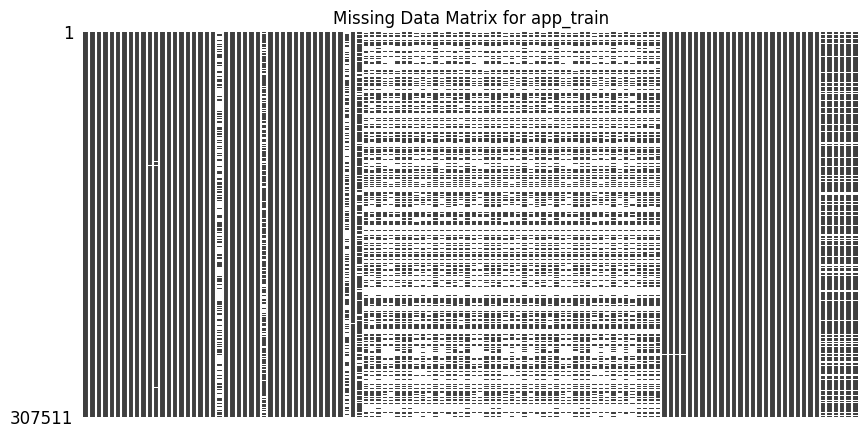


--- Missing report for Dataset: app_test ---
     Dataset               Column Name  Total Missing  Percent Missing
11  app_test            COMMONAREA_AVG          33495            68.72
25  app_test           COMMONAREA_MODE          33495            68.72
39  app_test           COMMONAREA_MEDI          33495            68.72
19  app_test   NONLIVINGAPARTMENTS_AVG          33347            68.41
33  app_test  NONLIVINGAPARTMENTS_MODE          33347            68.41
..       ...                       ...            ...              ...
54  app_test  OBS_30_CNT_SOCIAL_CIRCLE             29             0.06
56  app_test  OBS_60_CNT_SOCIAL_CIRCLE             29             0.06
57  app_test  DEF_60_CNT_SOCIAL_CIRCLE             29             0.06
0   app_test               AMT_ANNUITY             24             0.05
5   app_test              EXT_SOURCE_2              8             0.02

[64 rows x 4 columns]

--- Missing values matrix for Dataset: app_test ---


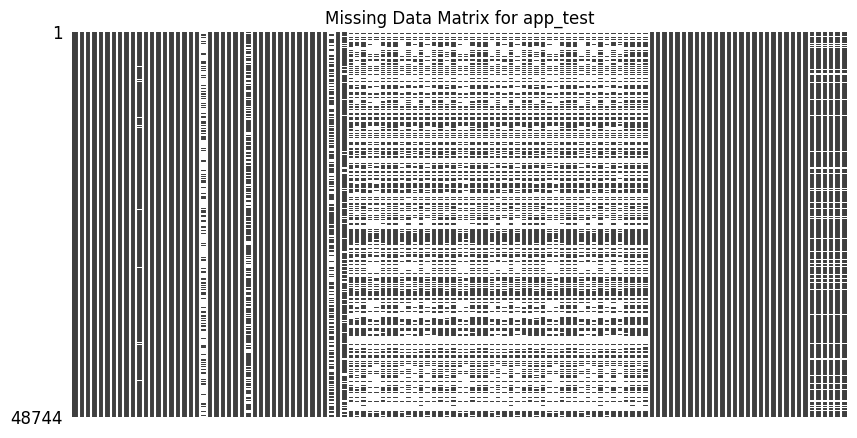


--- Missing report for Dataset: bureau ---
  Dataset             Column Name  Total Missing  Percent Missing
6  bureau             AMT_ANNUITY        1226791            71.47
2  bureau  AMT_CREDIT_MAX_OVERDUE        1124488            65.51
1  bureau       DAYS_ENDDATE_FACT         633653            36.92
5  bureau    AMT_CREDIT_SUM_LIMIT         591780            34.48
4  bureau     AMT_CREDIT_SUM_DEBT         257669            15.01
0  bureau     DAYS_CREDIT_ENDDATE         105553             6.15
3  bureau          AMT_CREDIT_SUM             13             0.00

--- Missing values matrix for Dataset: bureau ---


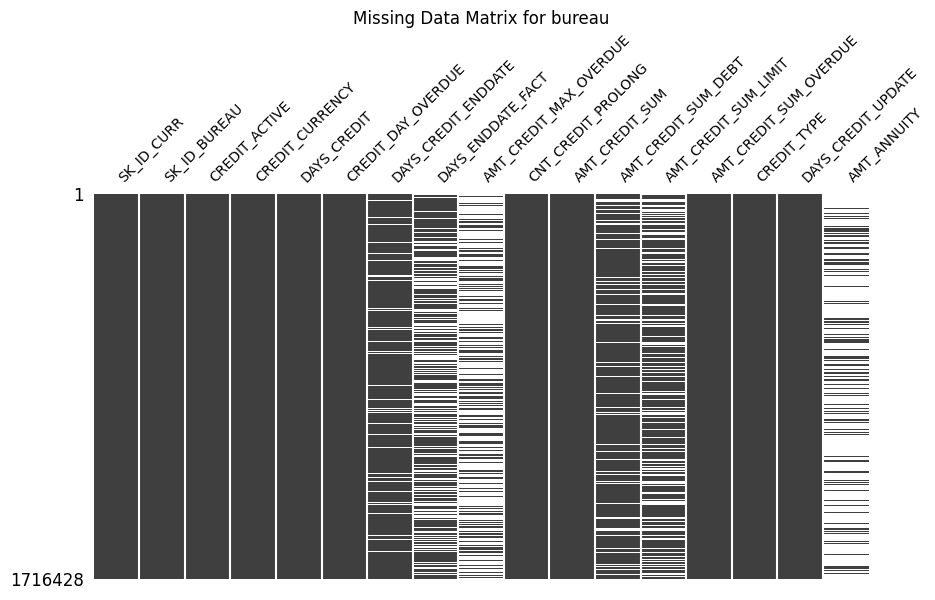


--- Missing report for Dataset: bureau_balance ---
This dataset has no missing values.

--- Missing values matrix for Dataset: bureau_balance ---


c:\Users\HLC\OneDrive\Duong's Documents\Projects\Credit Risk Modeling\.venv\Lib\site-packages\matplotlib\image.py:183: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


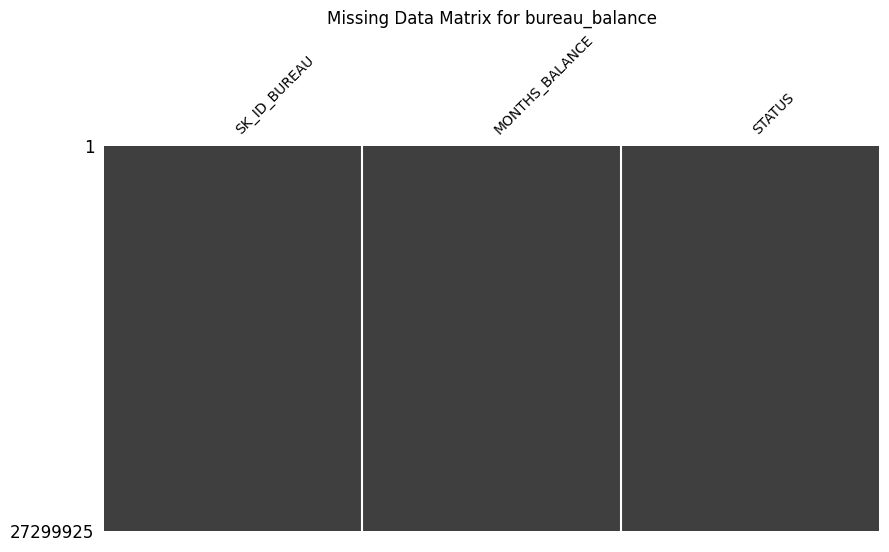


--- Missing report for Dataset: credit_card_balance ---
               Dataset                 Column Name  Total Missing  \
4  credit_card_balance         AMT_PAYMENT_CURRENT         767988   
0  credit_card_balance    AMT_DRAWINGS_ATM_CURRENT         749816   
1  credit_card_balance  AMT_DRAWINGS_OTHER_CURRENT         749816   
2  credit_card_balance    AMT_DRAWINGS_POS_CURRENT         749816   
5  credit_card_balance    CNT_DRAWINGS_ATM_CURRENT         749816   
7  credit_card_balance    CNT_DRAWINGS_POS_CURRENT         749816   
6  credit_card_balance  CNT_DRAWINGS_OTHER_CURRENT         749816   
3  credit_card_balance     AMT_INST_MIN_REGULARITY         305236   
8  credit_card_balance   CNT_INSTALMENT_MATURE_CUM         305236   

   Percent Missing  
4            20.00  
0            19.52  
1            19.52  
2            19.52  
5            19.52  
7            19.52  
6            19.52  
3             7.95  
8             7.95  

--- Missing values matrix for Dataset: cr

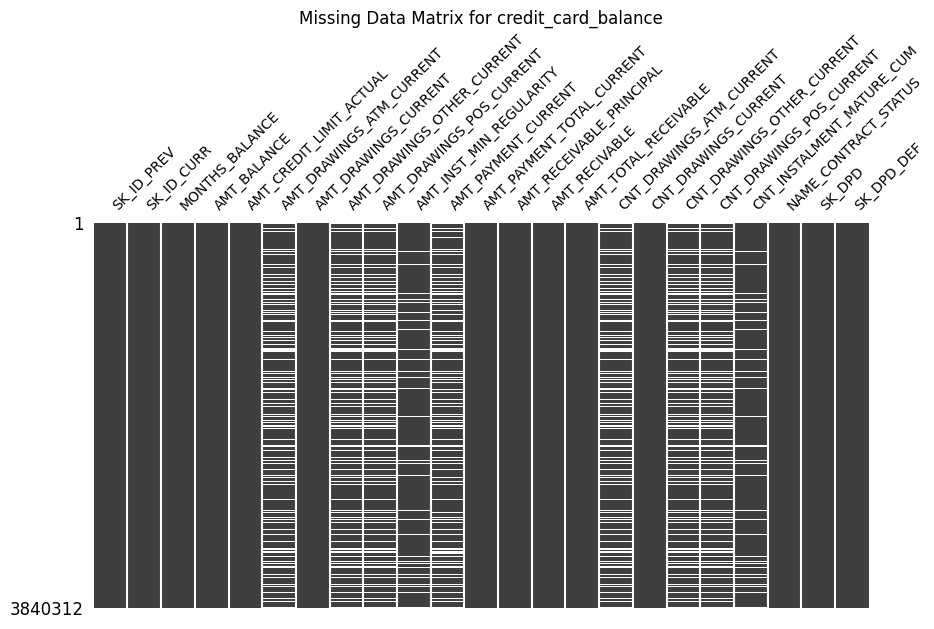


--- Missing report for Dataset: installments_payments ---
                 Dataset         Column Name  Total Missing  Percent Missing
0  installments_payments  DAYS_ENTRY_PAYMENT           2905             0.02
1  installments_payments         AMT_PAYMENT           2905             0.02

--- Missing values matrix for Dataset: installments_payments ---


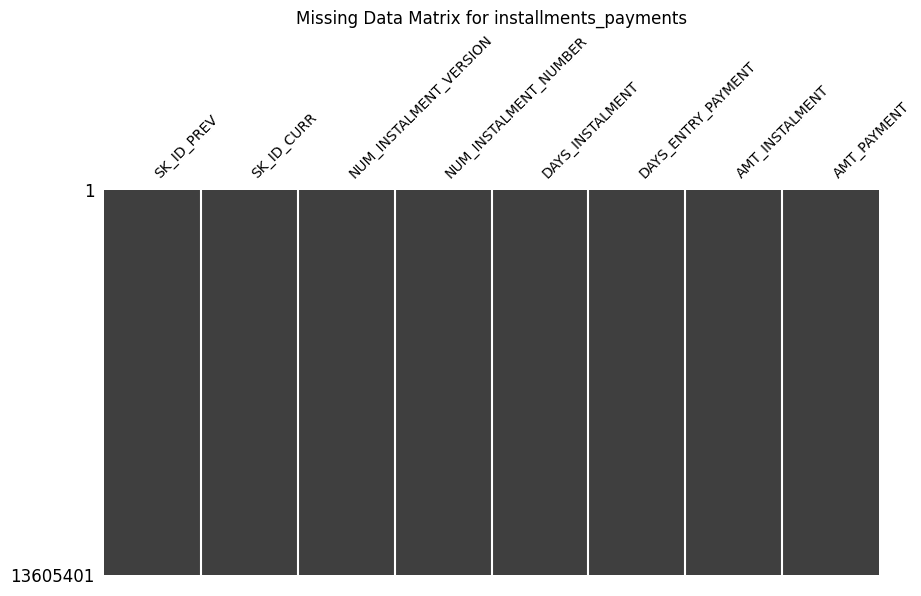


--- Missing report for Dataset: previous_application ---
                 Dataset                Column Name  Total Missing  \
6   previous_application   RATE_INTEREST_PRIVILEGED        1664263   
5   previous_application      RATE_INTEREST_PRIMARY        1664263   
2   previous_application           AMT_DOWN_PAYMENT         895844   
4   previous_application          RATE_DOWN_PAYMENT         895844   
7   previous_application            NAME_TYPE_SUITE         820405   
13  previous_application              DAYS_LAST_DUE         673065   
10  previous_application         DAYS_FIRST_DRAWING         673065   
11  previous_application             DAYS_FIRST_DUE         673065   
14  previous_application           DAYS_TERMINATION         673065   
15  previous_application  NFLAG_INSURED_ON_APPROVAL         673065   
12  previous_application  DAYS_LAST_DUE_1ST_VERSION         673065   
3   previous_application            AMT_GOODS_PRICE         385515   
0   previous_application        

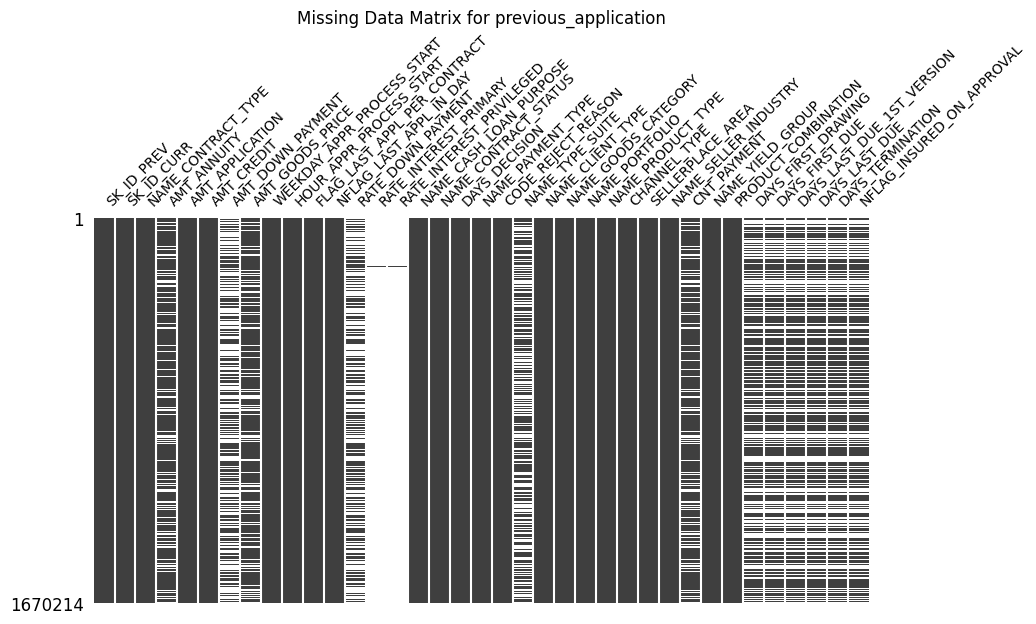


--- Missing report for Dataset: POS_CASH_balance ---
            Dataset            Column Name  Total Missing  Percent Missing
1  POS_CASH_balance  CNT_INSTALMENT_FUTURE          26087             0.26
0  POS_CASH_balance         CNT_INSTALMENT          26071             0.26

--- Missing values matrix for Dataset: POS_CASH_balance ---


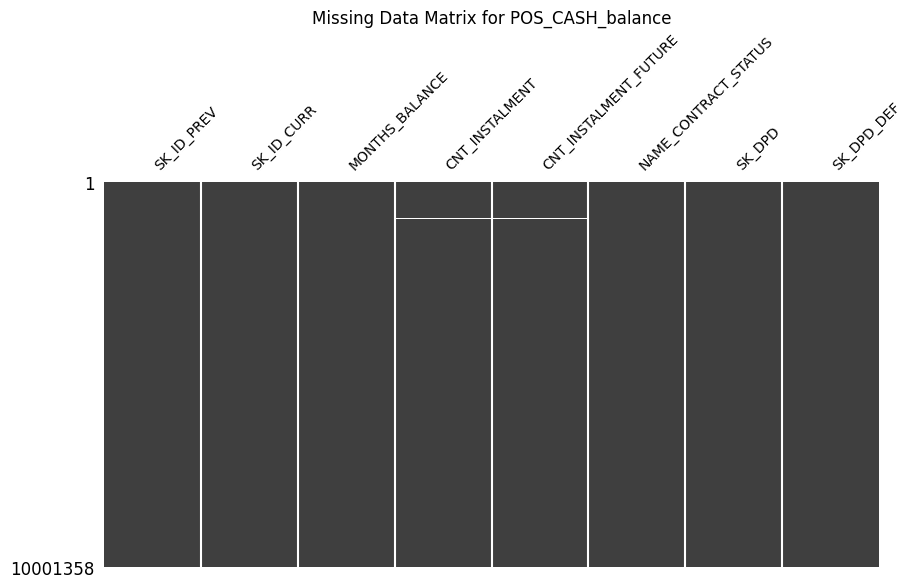

In [ ]:
for name, data_frame in datasets.items():
    print(f"\n--- Missing report for Dataset: {name} ---")
    report = detailed_missing_report(datasets, name)
    
    if report.empty:
        print("This dataset has no missing values.") 
    else:
        print(report)
    
    print(f"\n--- Missing values matrix for Dataset: {name} ---")
    msno.matrix(data_frame, figsize=(10, 5), sparkline=False, fontsize=10)
    plt.title(f'Missing Data Matrix for {name}')
    plt.show()

## 7. Target Variable Distribution

Visualize the distribution of the target variable (`TARGET`) to understand class imbalance in the training data.

Analysis Focus:
1. Class Distribution:
   - Proportion of defaults vs non-defaults
   - Identification of class imbalance
   - Base rate of credit defaults

2. Implications:
   - Model evaluation metrics selection
   - Sampling strategy requirements
   - Business context understanding

Key Considerations:
- Impact on model training approach
- Need for class balancing techniques
- Performance metric selection
- Model calibration requirements

This understanding guides:
- Choice of modeling techniques
- Sampling strategies
- Evaluation metric selection
- Business threshold setting

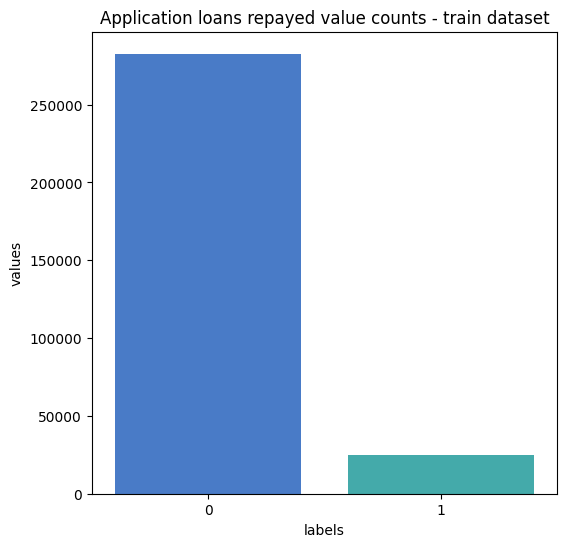

In [ ]:
loan1 = app_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': loan1.index,
                   'values': loan1.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed value counts - train dataset')
sns.barplot(x = 'labels', y="values", data=df, palette='winter', hue = 'labels', legend = False, alpha=0.8)
locs, labels = plt.xticks()
plt.show()

## 8. Preview Training Data

Display the first few rows of the training dataset to get an overview of the data structure and values.

Key Aspects to Observe:
1. Data Structure:
   - Column names and meanings
   - Value formats and ranges
   - Data quality indicators
   - Potential anomalies

2. Feature Types:
   - Demographic information
   - Financial indicators
   - Application details
   - Calculated ratios

3. Data Quality Checks:
   - Value consistency
   - Format standardization
   - Logical relationships
   - Potential data issues

This preview helps in:
- Understanding feature contexts
- Identifying data quality issues
- Planning feature engineering
- Detecting potential preprocessing needs

In [ ]:
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Categorical features exploration

## 9. Categorical Feature Analysis

Explore the distribution and default rates of categorical features using bar plots. This analysis reveals important patterns in categorical variables and their relationship with credit risk.

Analysis Components:
1. Distribution Analysis:
   - Category frequencies
   - Population segments
   - Rare categories identification
   - Market segment understanding

2. Default Rate Analysis:
   - Risk levels by category
   - High-risk segment identification
   - Risk pattern detection
   - Category risk ranking

Key Features Analyzed:
- Contract types and terms
- Education and employment
- Family and housing status
- Documentation and verification
- Regional indicators

Visualization Approach:
- Dual plot layout for each feature
- Distribution and risk visualization
- Clear category labeling
- Percentage-based comparisons

This helps identify:
- High-risk categories
- Potential discriminative features
- Category combinations for feature engineering
- Business-relevant insights

In [ ]:
import matplotlib.ticker as mtick

def plot_categorical(
    data: pd.DataFrame, 
    feature: str, 
    target: str = 'TARGET', 
    horizontal_layout: bool = True, 
    rotate_labels: bool = False
):

    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})

    cat_percent = data[[feature, target]].groupby([feature], as_index=False).mean()
    cat_percent.sort_values(by=target, ascending=False, inplace=True)
    
    sns.set_style("whitegrid")

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 12))
        
    fig.suptitle(f'Univariate Analysis of: {feature.replace("_", " ").title()} (Categorical)', fontsize=16, y=1.02)

    s1 = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1, palette="viridis", hue = feature, legend=False)
    ax1.set_title(f'Number of Contracts by {feature.replace("_", " ").title()}', fontsize=12)
    ax1.set_xlabel(feature.replace("_", " ").title(), fontsize=11)
    ax1.set_ylabel('Number of Contracts', fontsize=11)

    s2 = sns.barplot(ax=ax2, x=feature, y=target, order=cat_percent[feature], data=cat_percent, palette="viridis", hue = feature, legend=False)
    ax2.set_title(f'Default Percent by {feature.replace("_", " ").title()}', fontsize=12)
    ax2.set_xlabel(feature.replace("_", " ").title(), fontsize=11)
    ax2.set_ylabel('% (Target = 1)', fontsize=11)
    
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    if rotate_labels:
        
        num_categories = df1.shape[0]
        if  num_categories > 20:
            rotate_angle = 90
            ha_style = 'right'
        else:
            rotate_angle = 45
            ha_style = 'right'
            
        s1_labels = df1[feature].tolist()
        s1.set_xticks(range(len(s1_labels)))
        s1.set_xticklabels(s1_labels, rotation=rotate_angle, ha=ha_style)
        
        s2_labels = cat_percent[feature].tolist()
        s2.set_xticks(range(len(s2_labels))) 
        s2.set_xticklabels(s2_labels, rotation=rotate_angle, ha=ha_style)
        
    plt.tight_layout()
    plt.show()


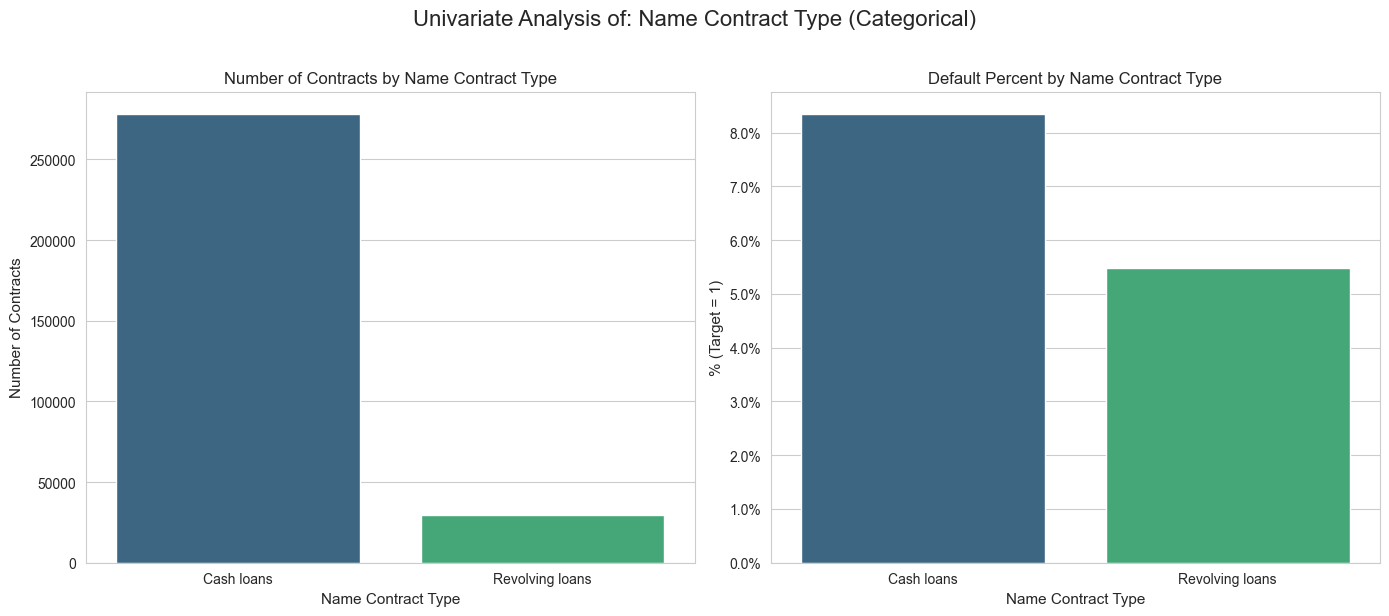

In [ ]:
plot_categorical(data = app_train, feature='NAME_CONTRACT_TYPE')

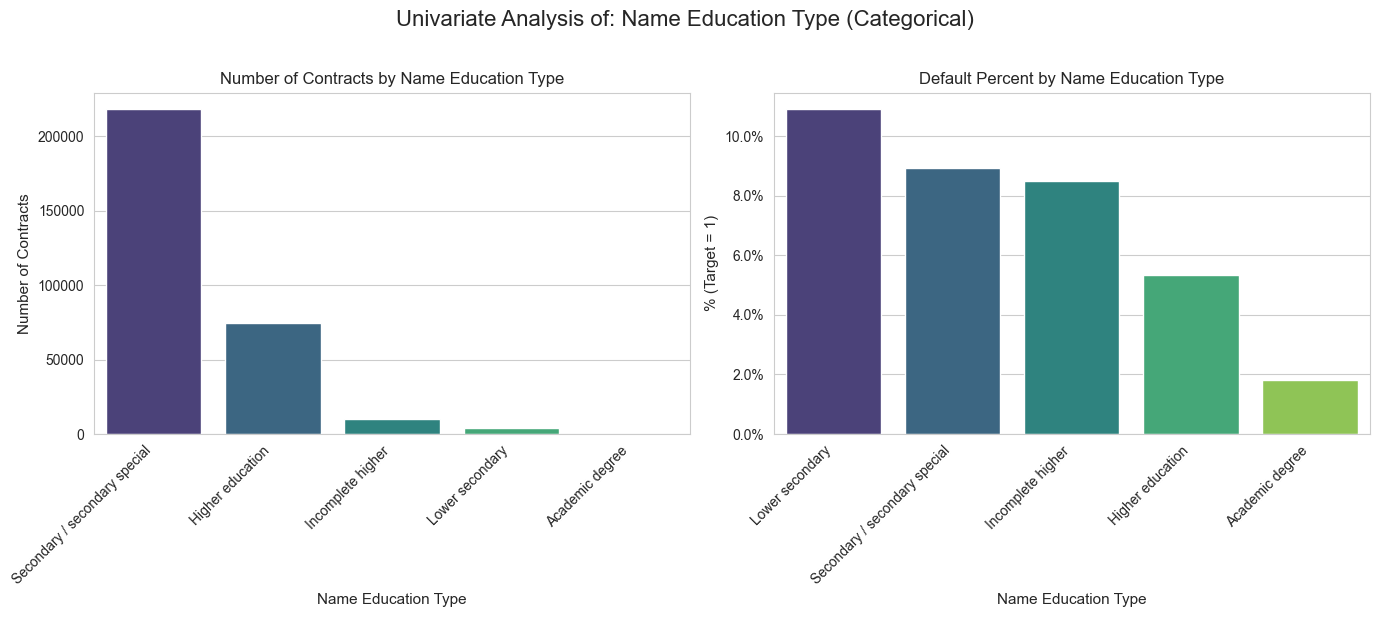

In [ ]:
plot_categorical(data = app_train, feature='NAME_EDUCATION_TYPE', rotate_labels=True)

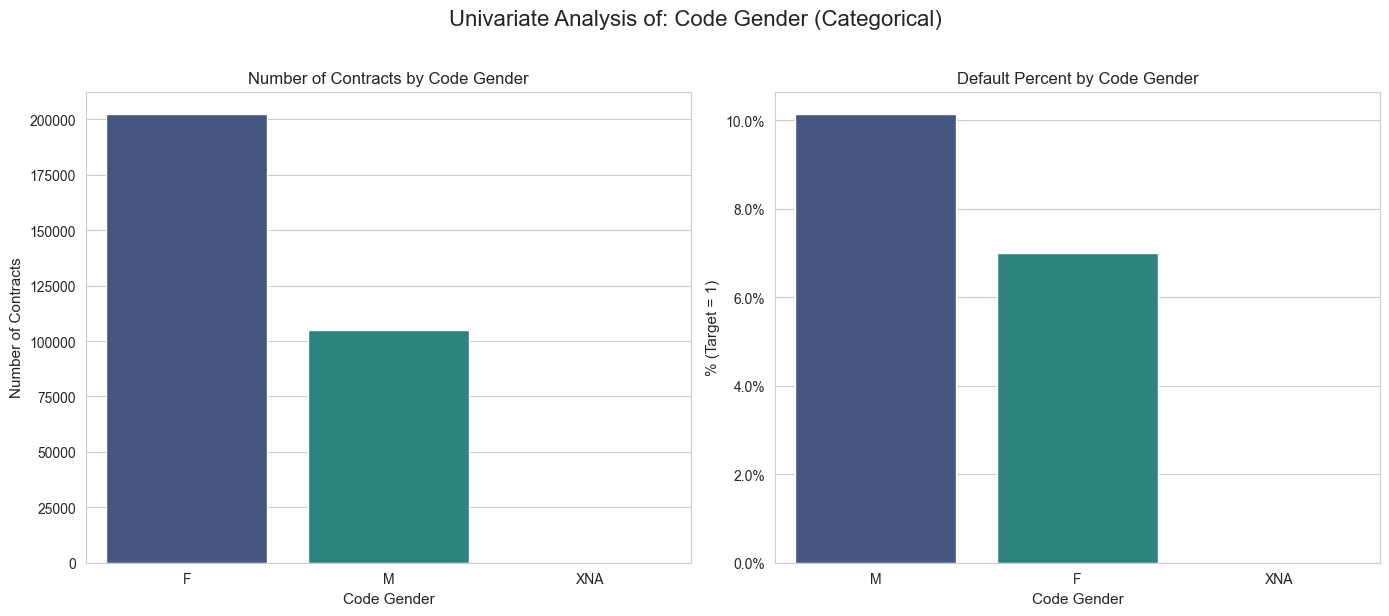

In [ ]:
plot_categorical(data = app_train, feature='CODE_GENDER')

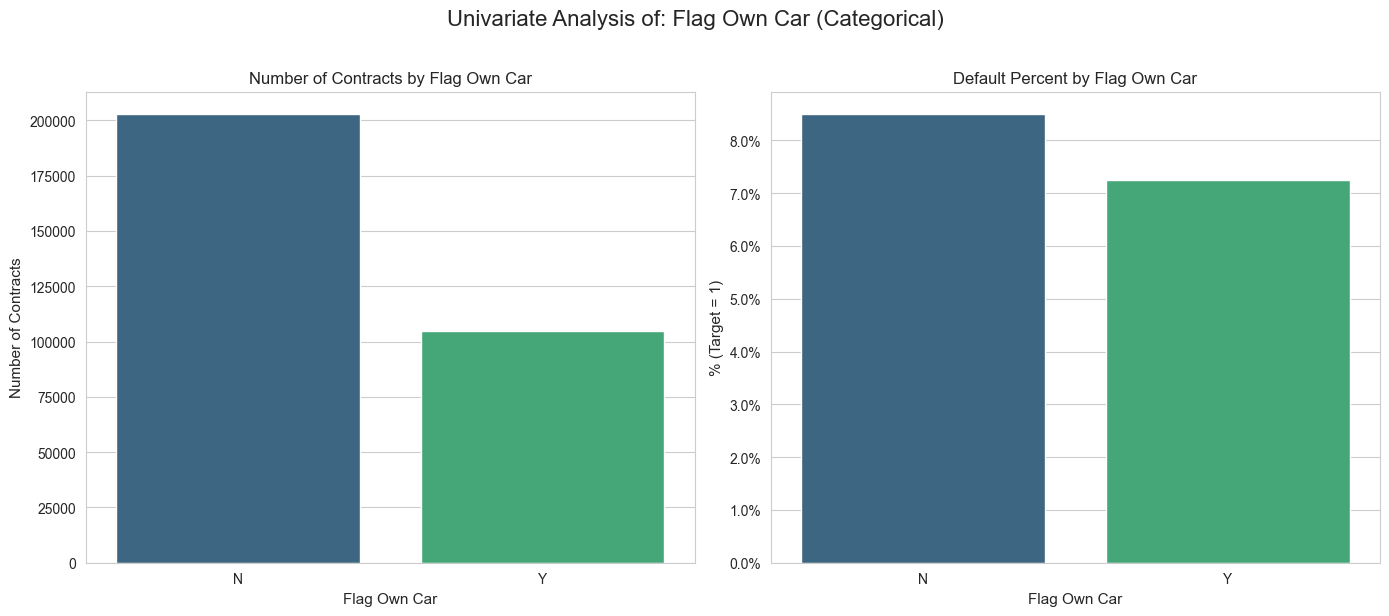

In [ ]:
plot_categorical(data = app_train, feature='FLAG_OWN_CAR')

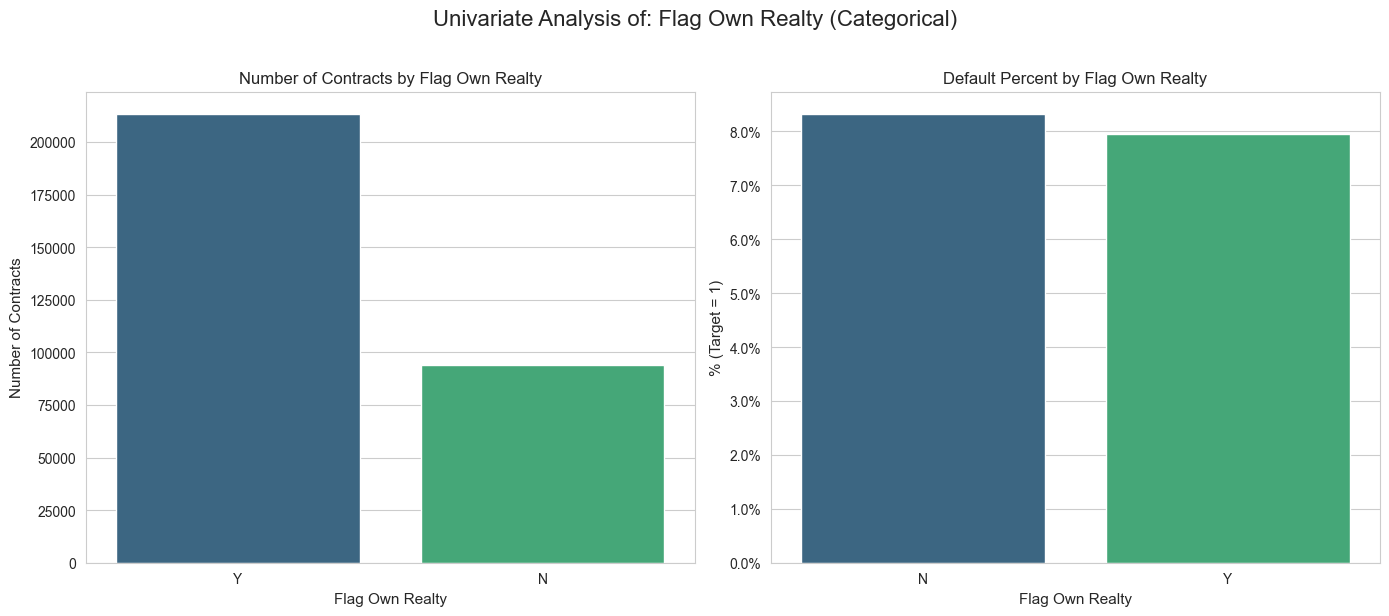

In [ ]:
plot_categorical(data = app_train, feature='FLAG_OWN_REALTY')

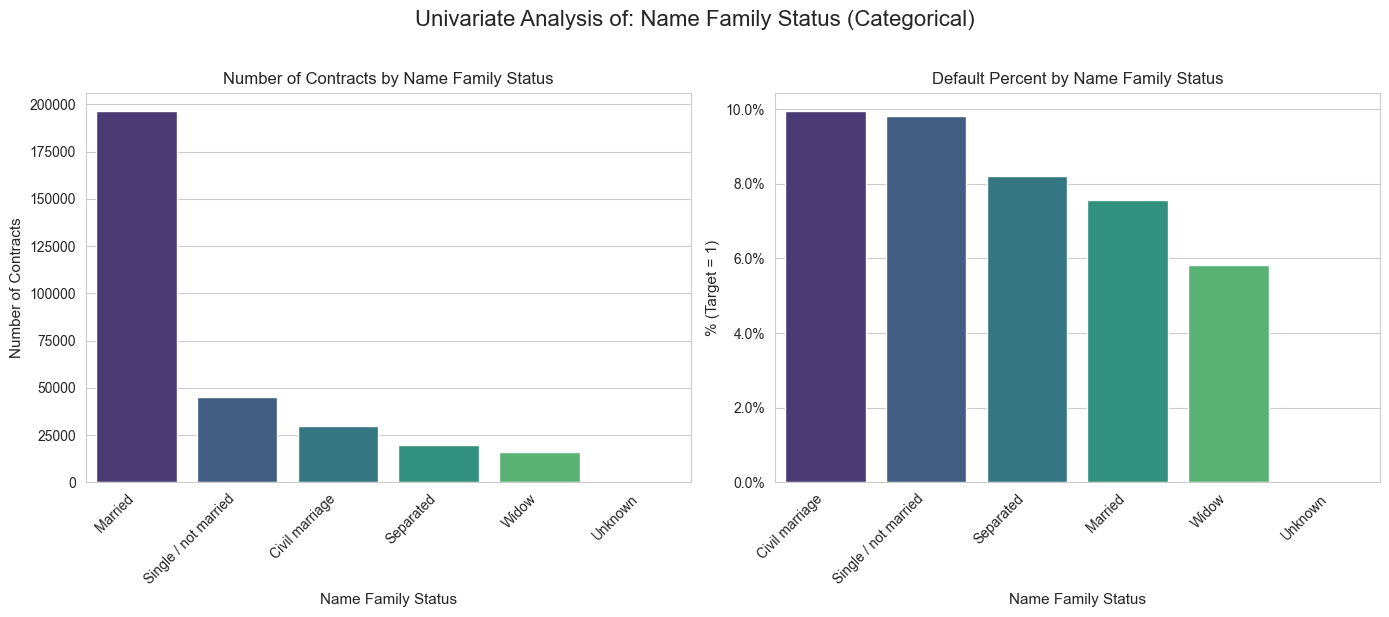

In [ ]:
plot_categorical(data = app_train, feature='NAME_FAMILY_STATUS', rotate_labels=True)

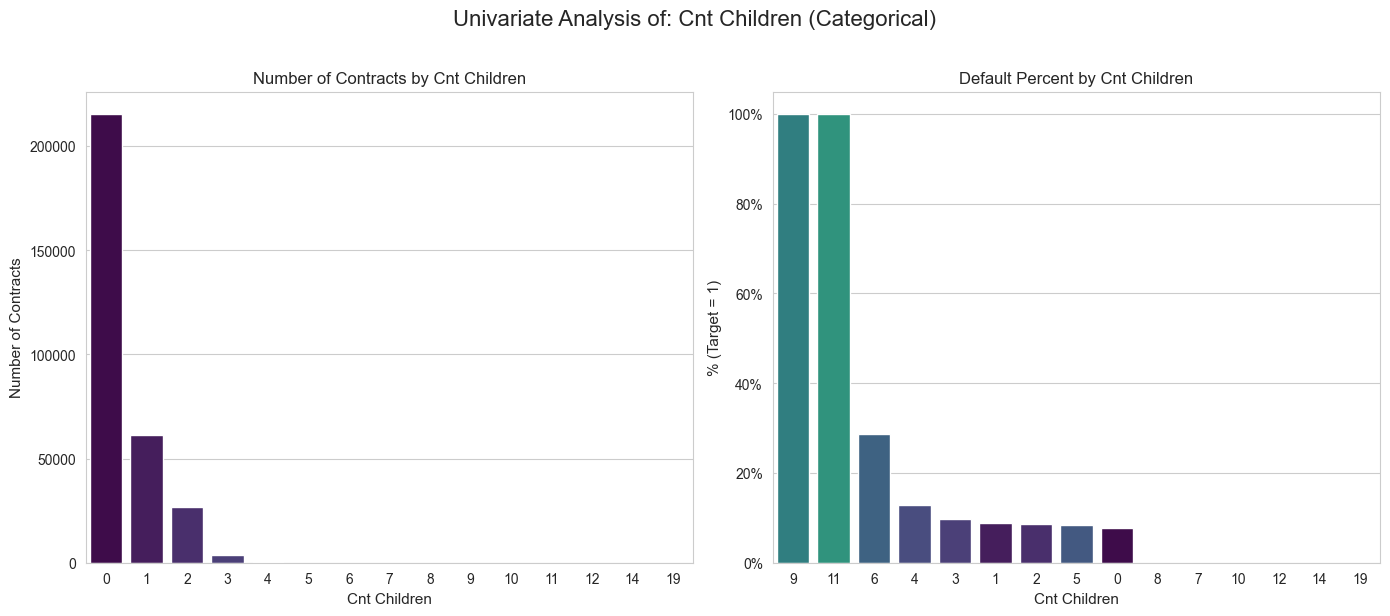

In [ ]:
plot_categorical(data = app_train, feature='CNT_CHILDREN')

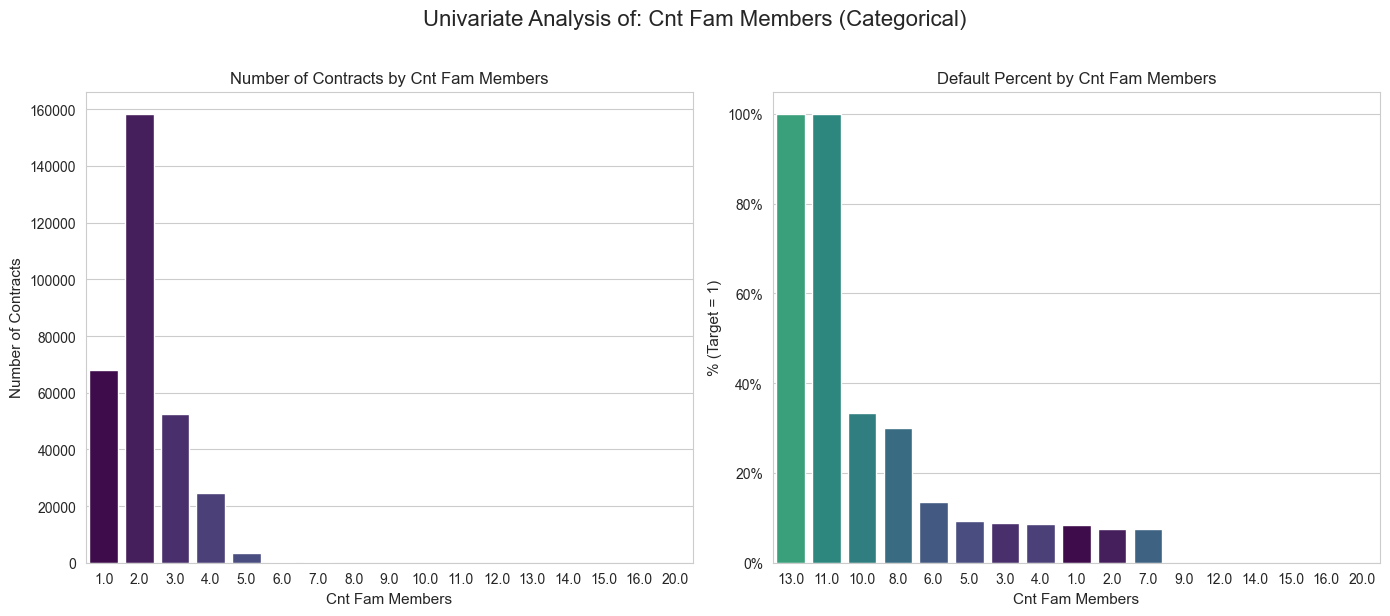

In [ ]:
plot_categorical(data = app_train, feature='CNT_FAM_MEMBERS')

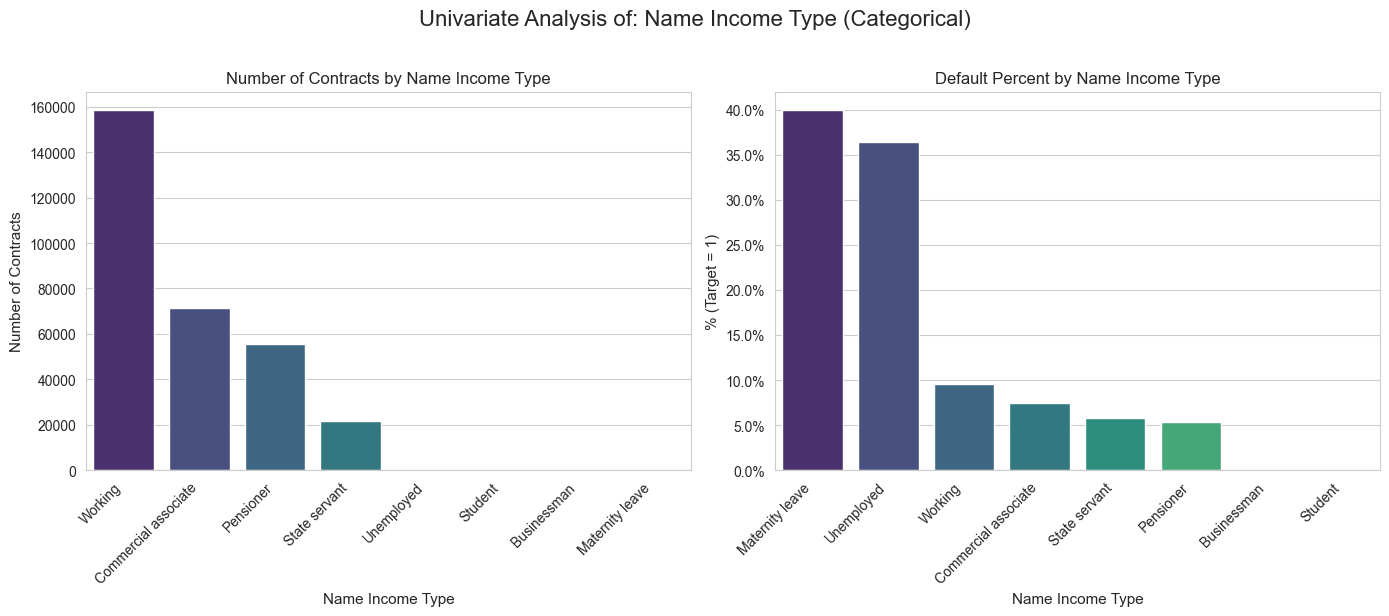

In [ ]:
plot_categorical(data = app_train, feature='NAME_INCOME_TYPE', rotate_labels=True)

In [ ]:
from IPython.display import display
display(app_train.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

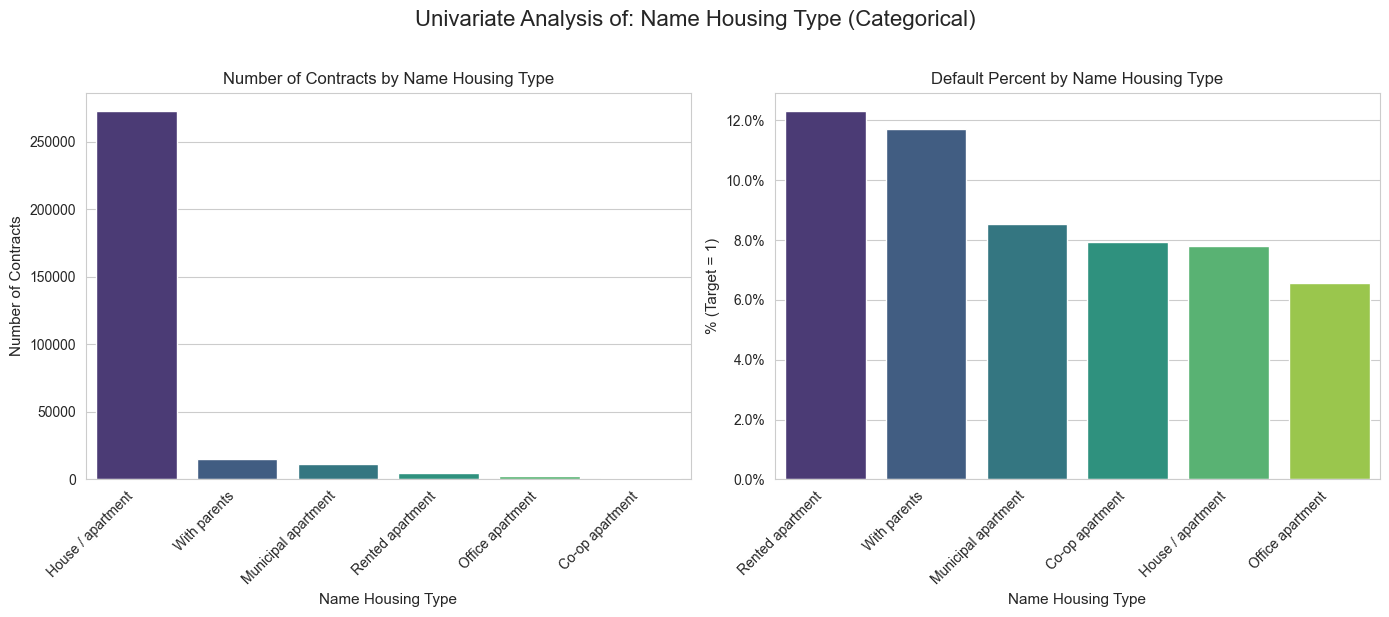

In [ ]:
plot_categorical(data = app_train, feature='NAME_HOUSING_TYPE', rotate_labels=True)

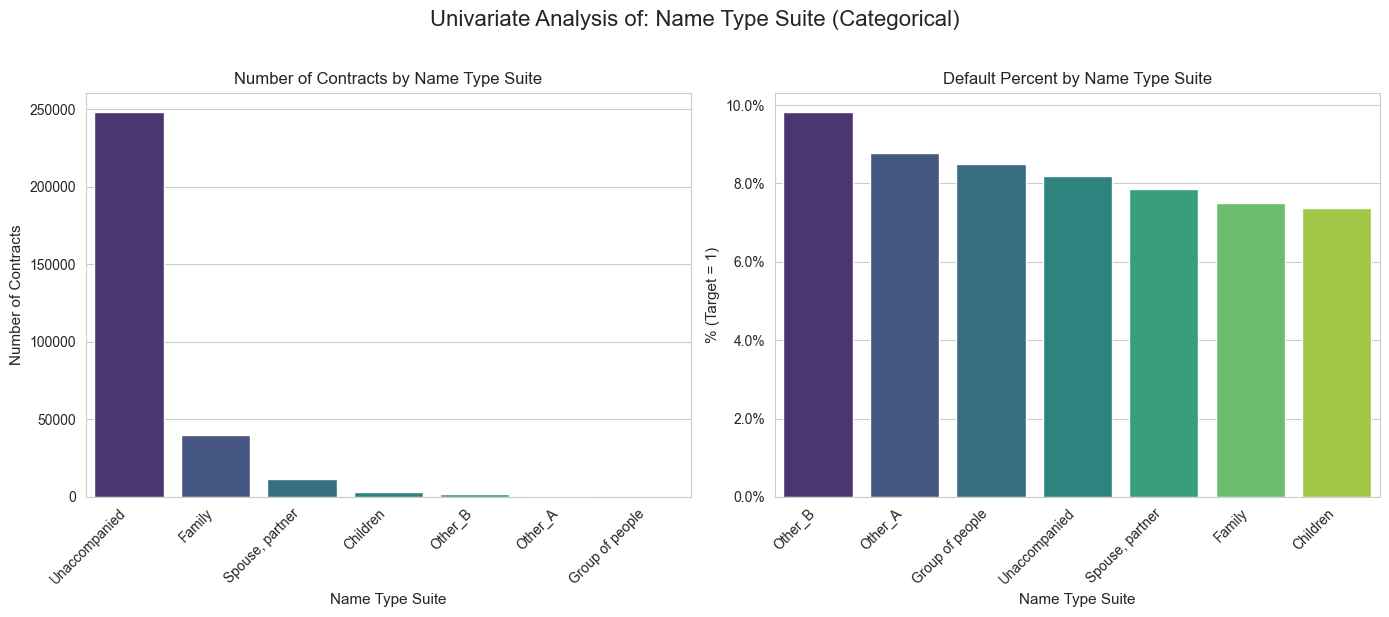

In [ ]:
plot_categorical(data = app_train, feature='NAME_TYPE_SUITE', rotate_labels=True)

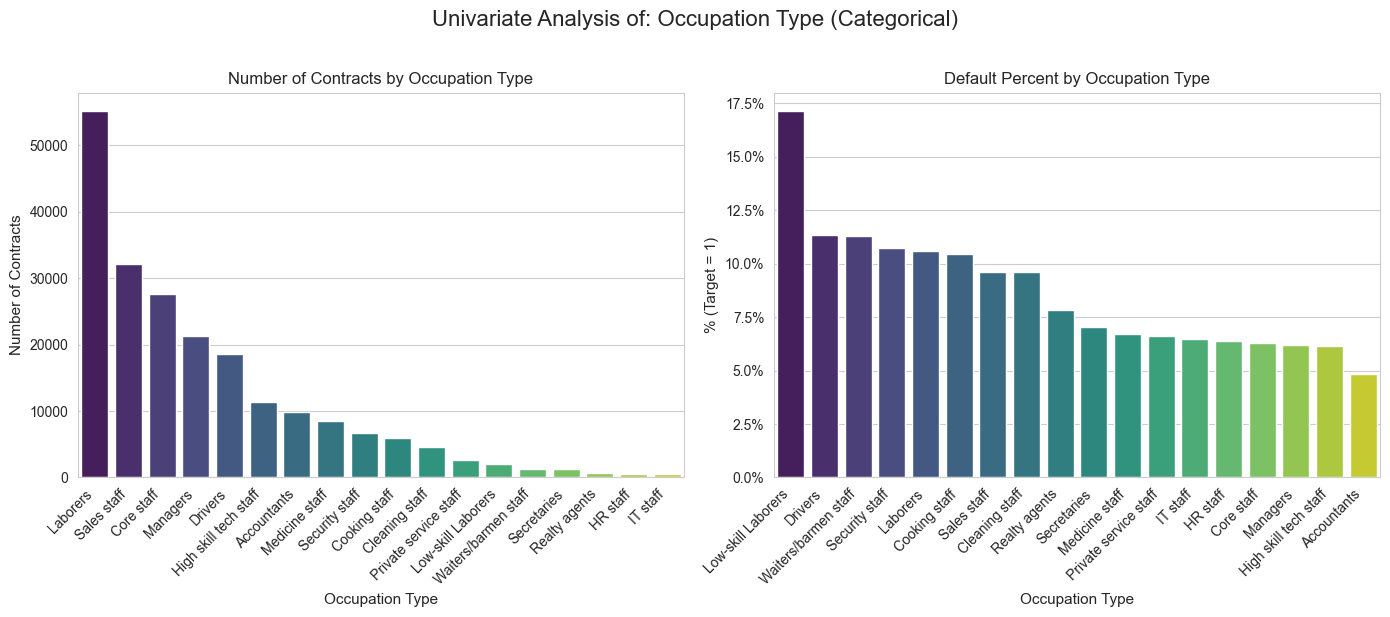

In [ ]:
plot_categorical(data = app_train, feature='OCCUPATION_TYPE', rotate_labels=True)

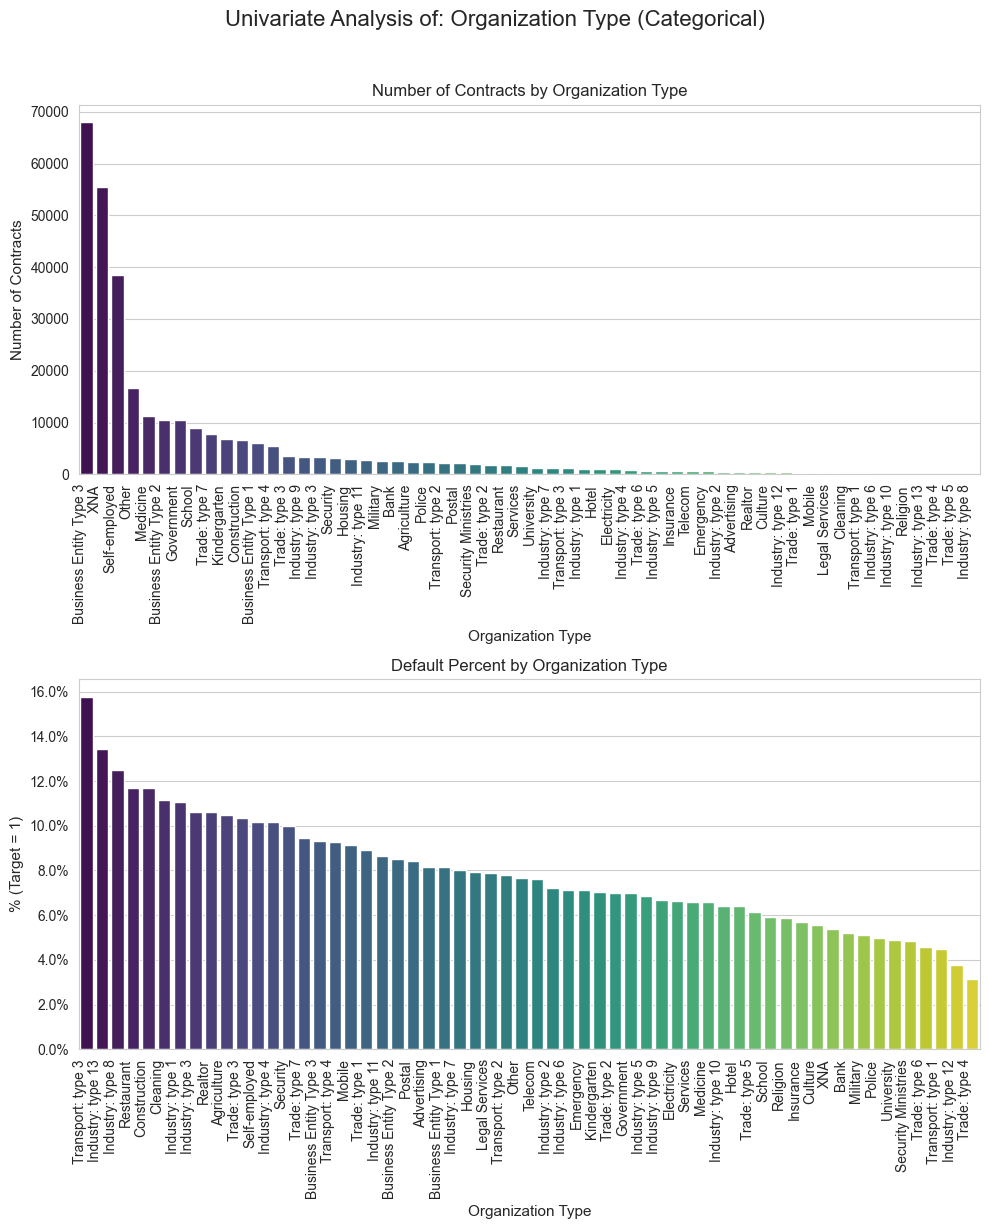

In [ ]:
plot_categorical(data = app_train, feature='ORGANIZATION_TYPE', rotate_labels=True, horizontal_layout=False)

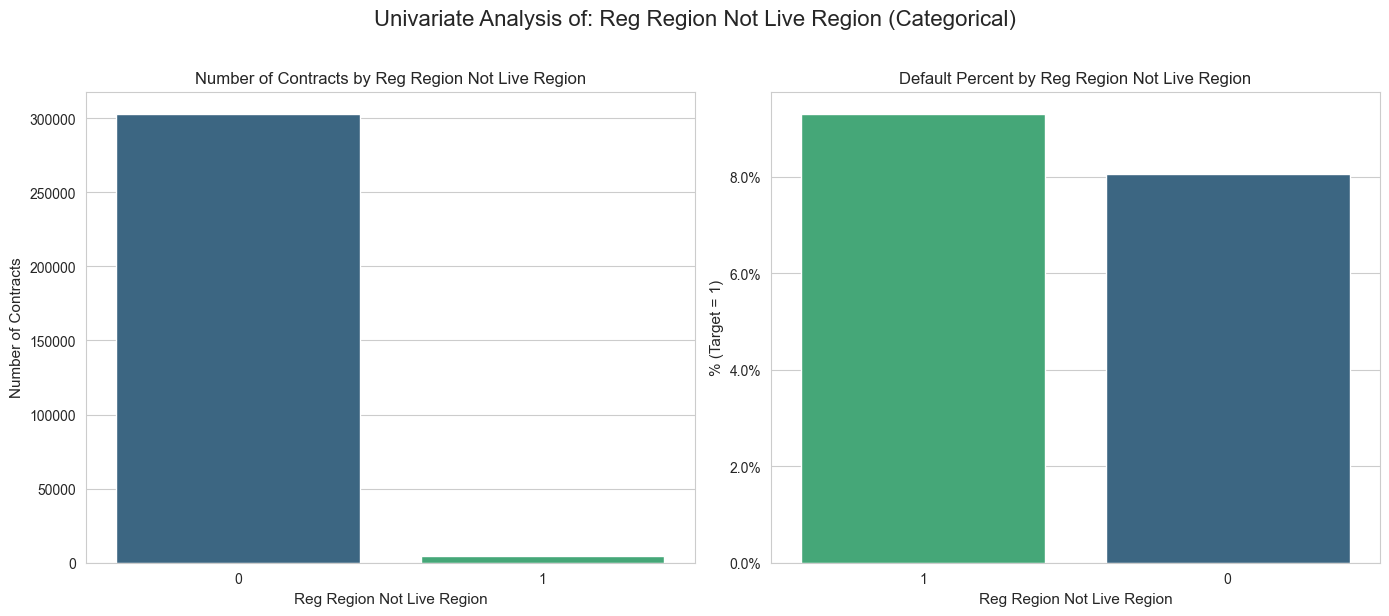

In [ ]:
plot_categorical(data = app_train, feature='REG_REGION_NOT_LIVE_REGION', rotate_labels=False)

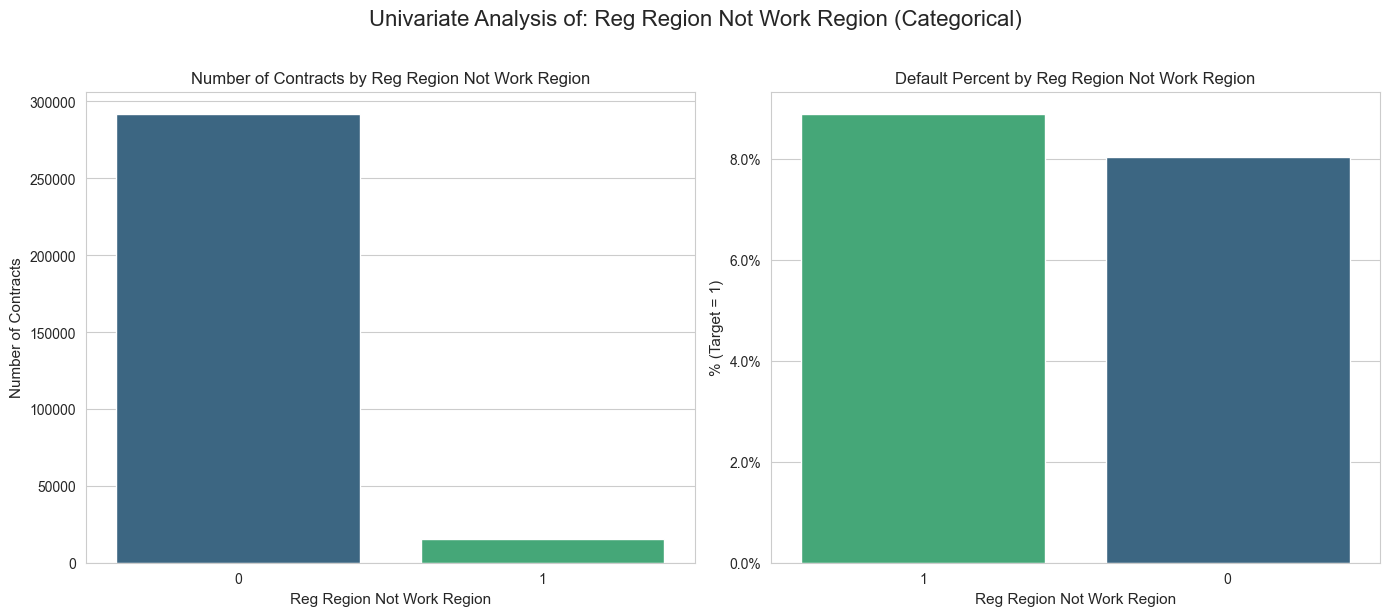

In [ ]:
plot_categorical(data = app_train, feature='REG_REGION_NOT_WORK_REGION', rotate_labels=False)

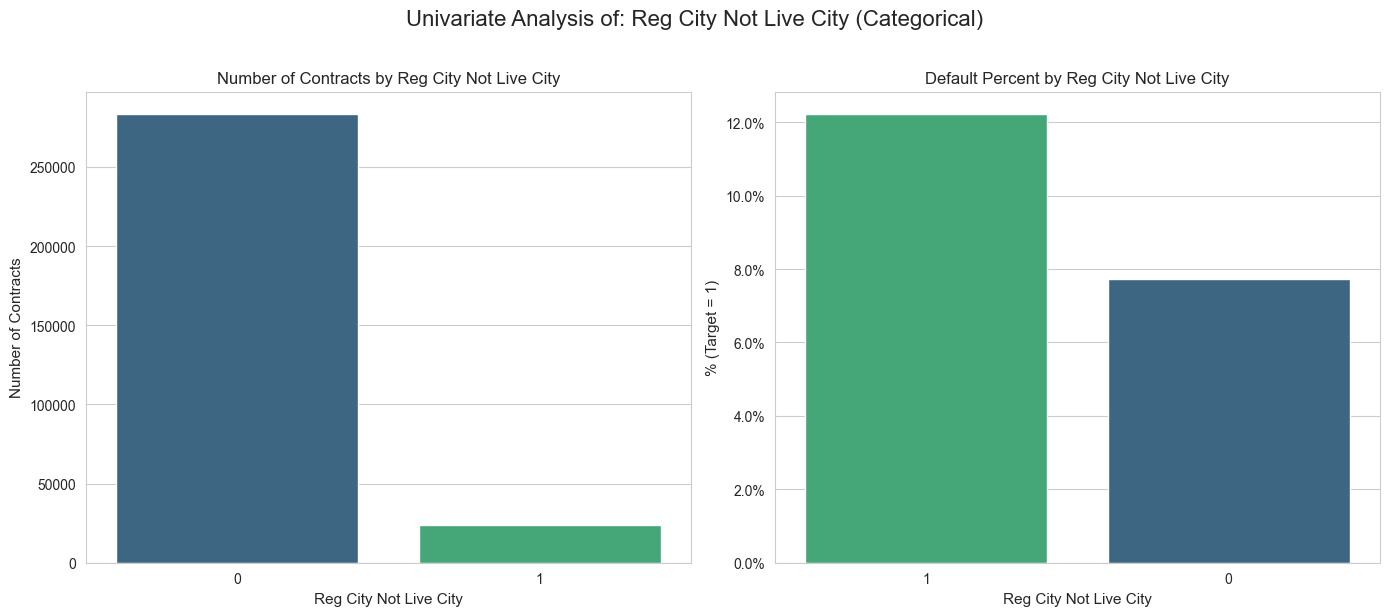

In [ ]:
plot_categorical(data = app_train, feature='REG_CITY_NOT_LIVE_CITY', rotate_labels=False)

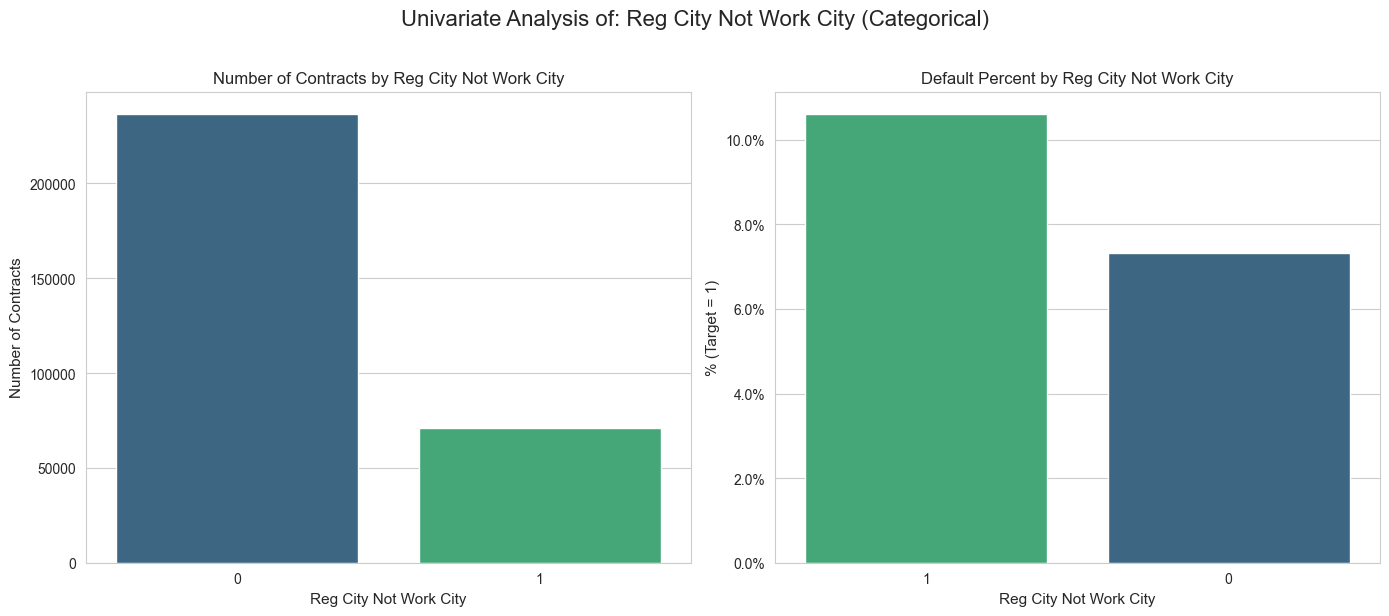

In [ ]:
plot_categorical(data = app_train, feature='REG_CITY_NOT_WORK_CITY', rotate_labels=False)

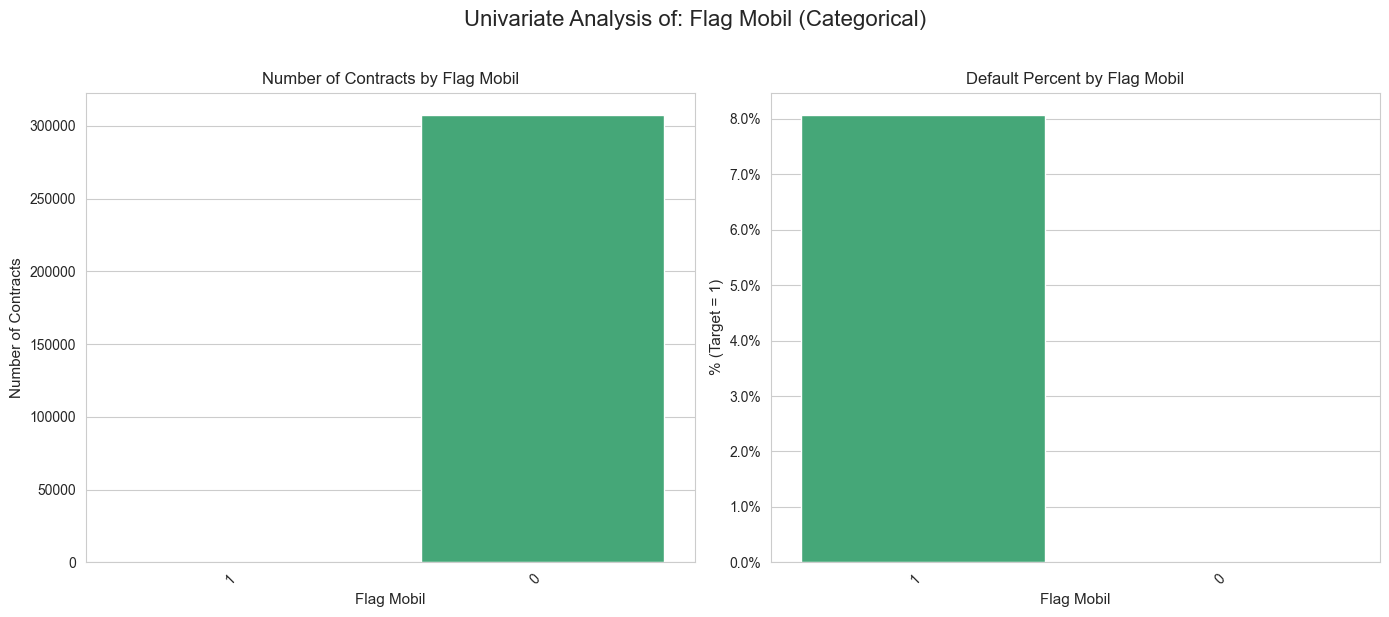

In [ ]:
plot_categorical(data = app_train, feature='FLAG_MOBIL', rotate_labels=True)

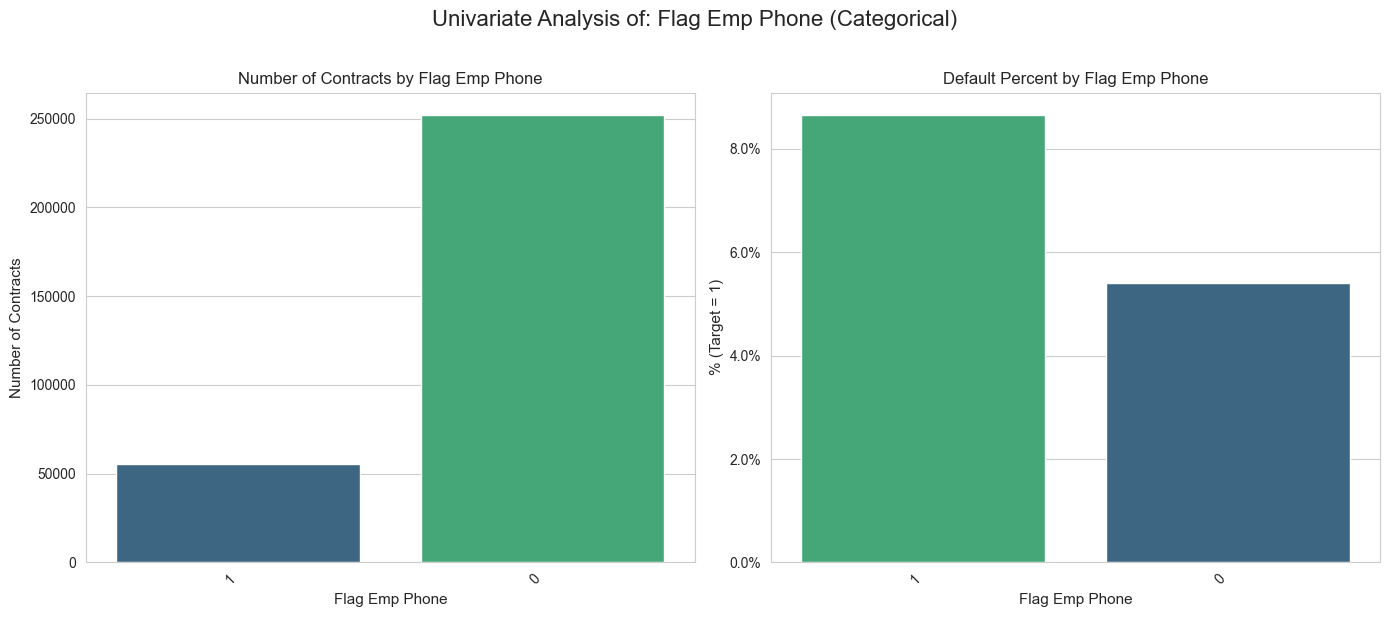

In [ ]:
plot_categorical(data = app_train, feature='FLAG_EMP_PHONE', rotate_labels=True)

## 10. Continuous Feature Distribution

Visualize the distribution of important continuous features to detect outliers, skewness, and data ranges.

Key Numerical Features:
1. Financial Metrics:
   - Income amounts
   - Credit amounts
   - Goods prices
   - Payment amounts

2. Temporal Features:
   - Age (DAYS_BIRTH)
   - Employment duration
   - Registration timing
   - Document dates

Analysis Objectives:
1. Distribution Characteristics:
   - Central tendency
   - Spread and variance
   - Skewness and kurtosis
   - Outlier presence

2. Data Quality:
   - Value ranges
   - Anomaly detection
   - Missing patterns
   - Inconsistencies

3. Preprocessing Needs:
   - Scaling requirements
   - Transformation needs
   - Outlier handling
   - Feature engineering opportunities

Visualization Features:
- Histograms with KDE
- Appropriate binning
- Color coding by feature type
- Clear axis labeling

In [ ]:
def plot_single_dist(df, 
                     feature, 
                     ax=None,
                     color="tab:blue",
                     bins=100,  
                     kde=True, 
                     alpha=0.6, 
                     figsize=(10,6)):
    
    sns.set_style("whitegrid")
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        standalone_plot = True
    else:
       
        fig = ax.figure 
        standalone_plot = False 

    sns.histplot(df[feature].dropna(),
                 bins=bins, kde=kde, color=color, alpha=alpha, ax=ax)

    ax.set_title(f"Distribution of {feature}", fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    
    if standalone_plot:
        plt.tight_layout()
        plt.show()
        
    return fig, ax

In [ ]:
import math

def plot_compare_dist(df, var_list, 
                      target_col="TARGET",
                      nrow=None, 
                      palette=("tab:red", "tab:blue"),
                      bw_adjust=0.7, 
                      figsize=(12,5)):
   
    pos = df[df[target_col] == 1]
    neg = df[df[target_col] == 0]

    n_plots = len(var_list)
    if nrow is None:
        nrow = math.ceil(n_plots / 2)

    fig, axes = plt.subplots(nrow, 2,
                             figsize=(figsize[0], figsize[1]*nrow),
                             squeeze=False)
    axes = axes.flatten() 

    sns.set_style("whitegrid")
    for idx, feature in enumerate(var_list):
        ax = axes[idx]
        
        sns.kdeplot(pos[feature].dropna(),
                    bw_adjust=bw_adjust, ax=ax,
                    label="TARGET = 1", color=palette[0])
        
        sns.kdeplot(neg[feature].dropna(),
                    bw_adjust=bw_adjust, ax=ax,
                    label="TARGET = 0", color=palette[1])
        ax.set_xlabel(feature, fontsize=11)
        ax.set_ylabel("Density", fontsize=11)
        ax.legend()
    
    for extra in range(idx+1, len(axes)):
        axes[extra].set_visible(False)

    plt.tight_layout()
    return fig, axes

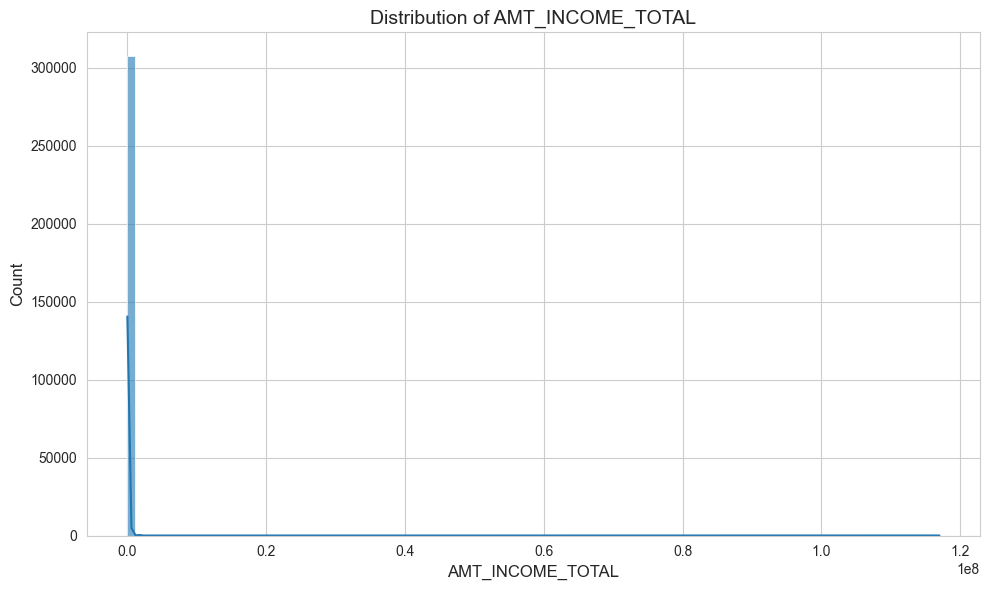

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution of AMT_INCOME_TOTAL'}, xlabel='AMT_INCOME_TOTAL', ylabel='Count'>)

In [ ]:
plot_single_dist(app_train, 'AMT_INCOME_TOTAL')

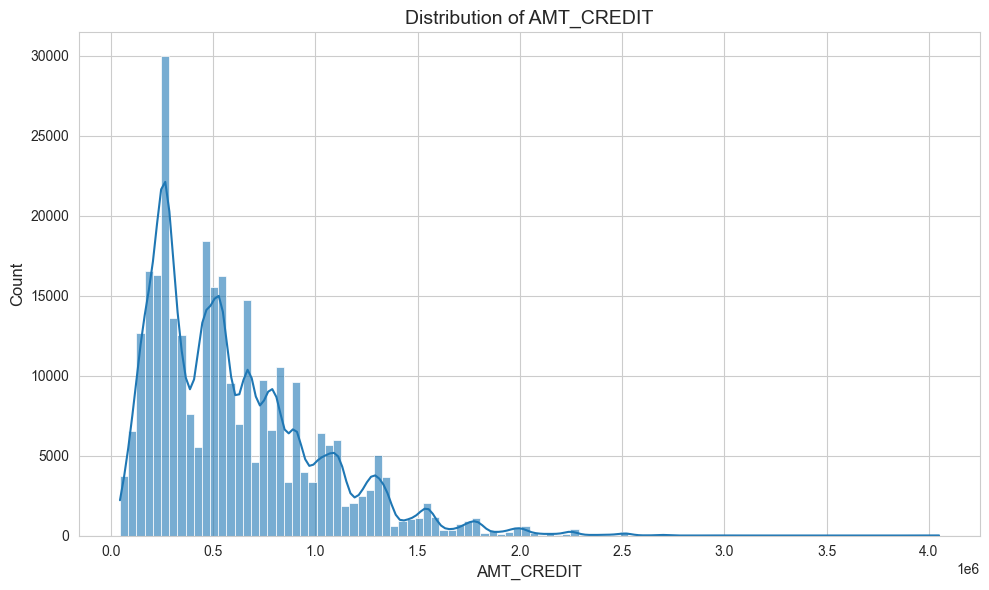

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution of AMT_CREDIT'}, xlabel='AMT_CREDIT', ylabel='Count'>)

In [ ]:
plot_single_dist(app_train, 'AMT_CREDIT')

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution of AMT_GOODS_PRICE'}, xlabel='AMT_GOODS_PRICE', ylabel='Count'>)

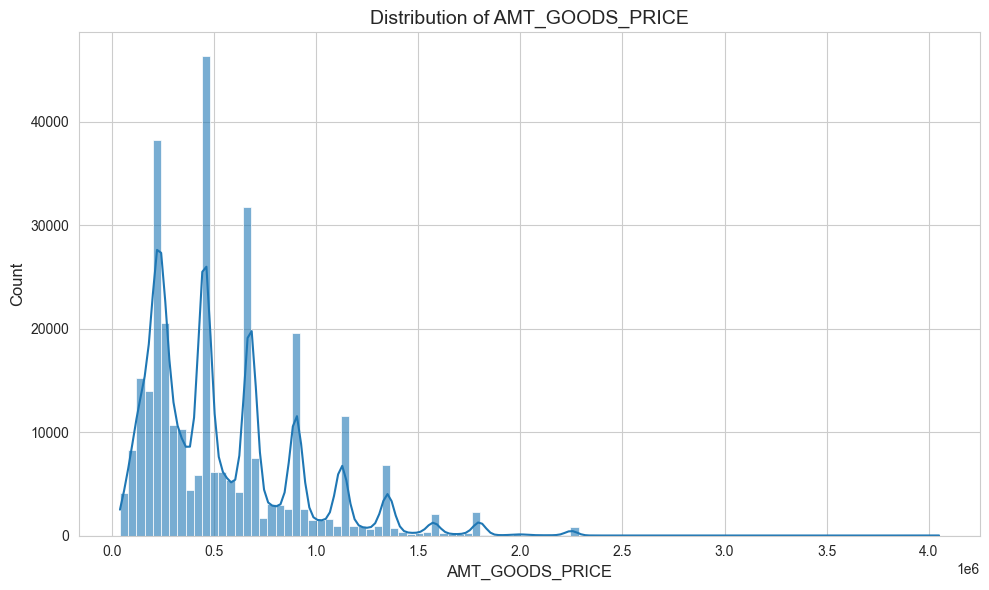

In [ ]:
plot_single_dist(app_train, 'AMT_GOODS_PRICE')

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution of AMT_ANNUITY'}, xlabel='AMT_ANNUITY', ylabel='Count'>)

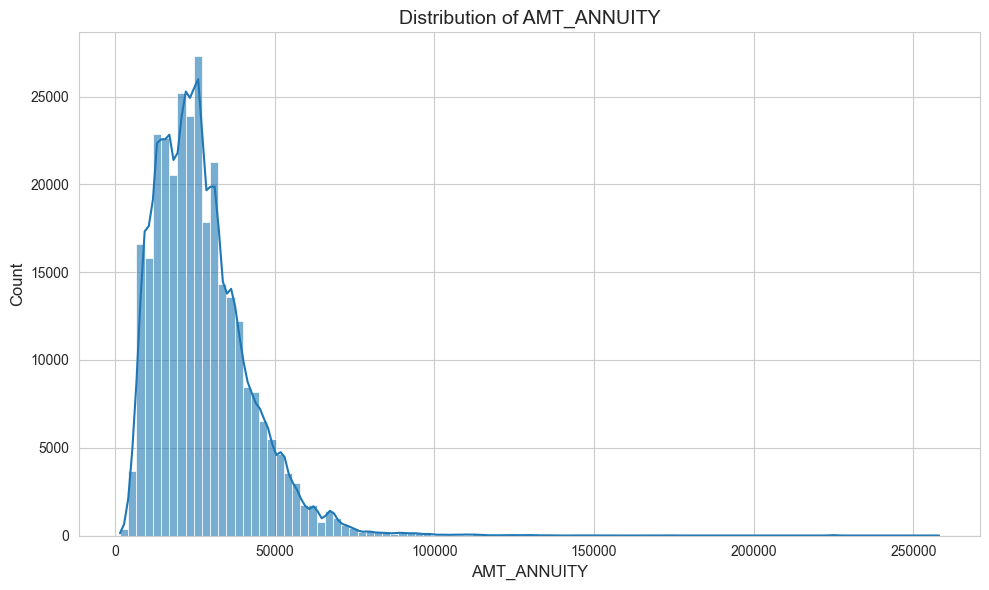

In [ ]:
plot_single_dist(app_train, 'AMT_ANNUITY')

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution of DAYS_BIRTH'}, xlabel='DAYS_BIRTH', ylabel='Count'>)

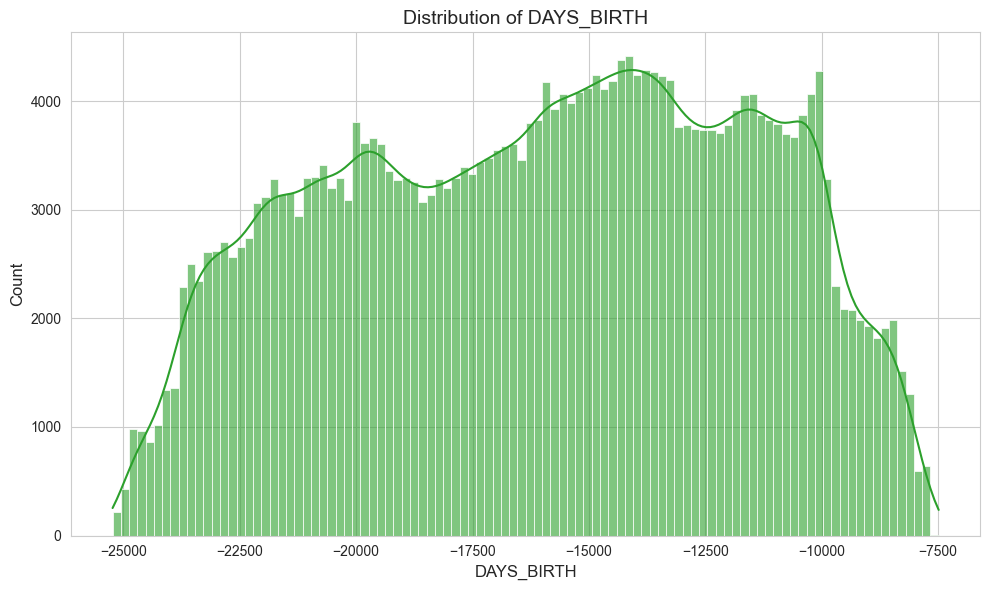

In [ ]:
plot_single_dist(app_train, 'DAYS_BIRTH', color="tab:green")

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution of DAYS_EMPLOYED'}, xlabel='DAYS_EMPLOYED', ylabel='Count'>)

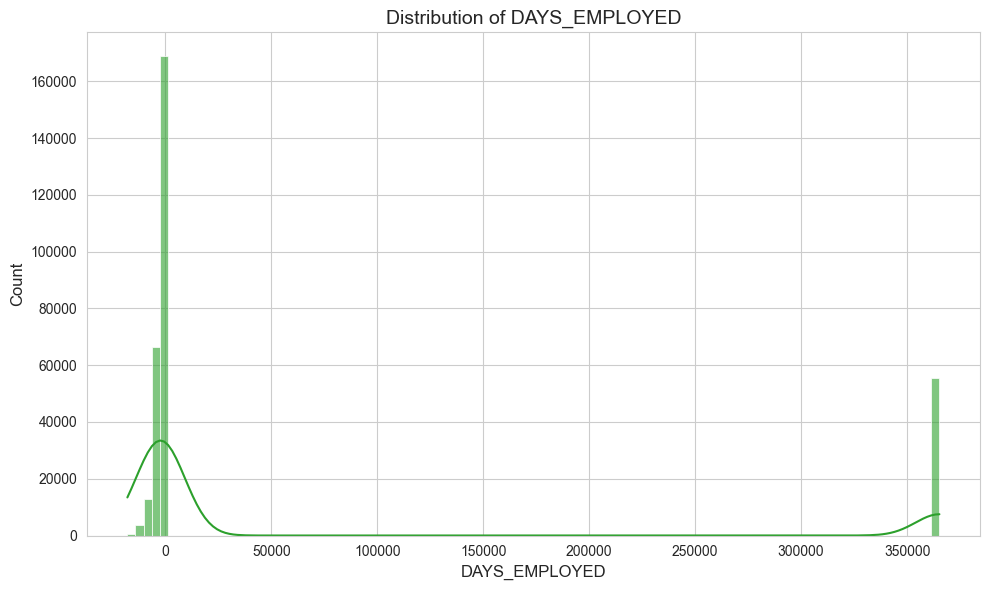

In [ ]:
plot_single_dist(app_train, 'DAYS_EMPLOYED', color="tab:green")

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution of DAYS_REGISTRATION'}, xlabel='DAYS_REGISTRATION', ylabel='Count'>)

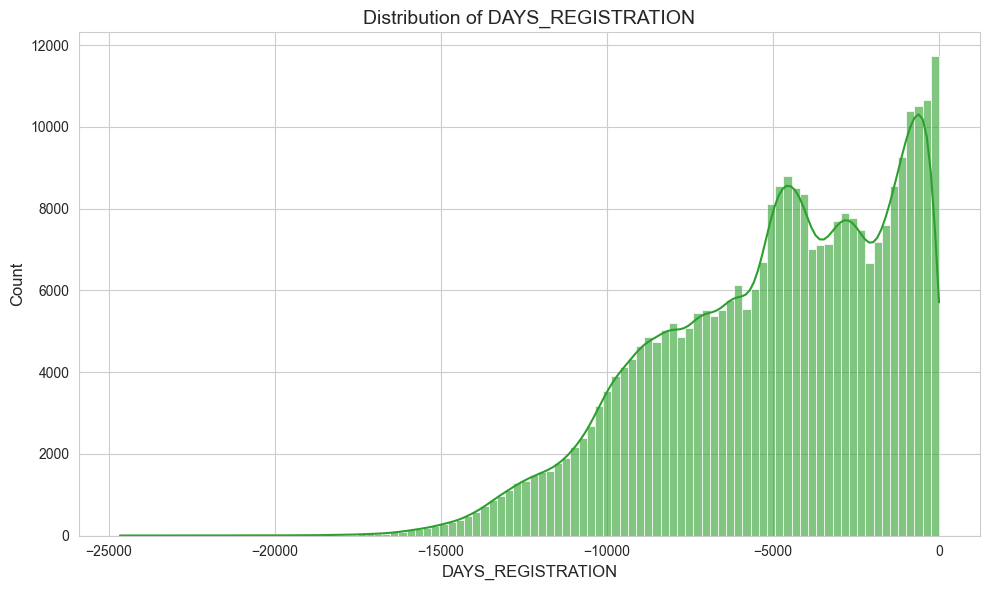

In [ ]:
plot_single_dist(app_train, 'DAYS_REGISTRATION', color="tab:green")

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution of DAYS_ID_PUBLISH'}, xlabel='DAYS_ID_PUBLISH', ylabel='Count'>)

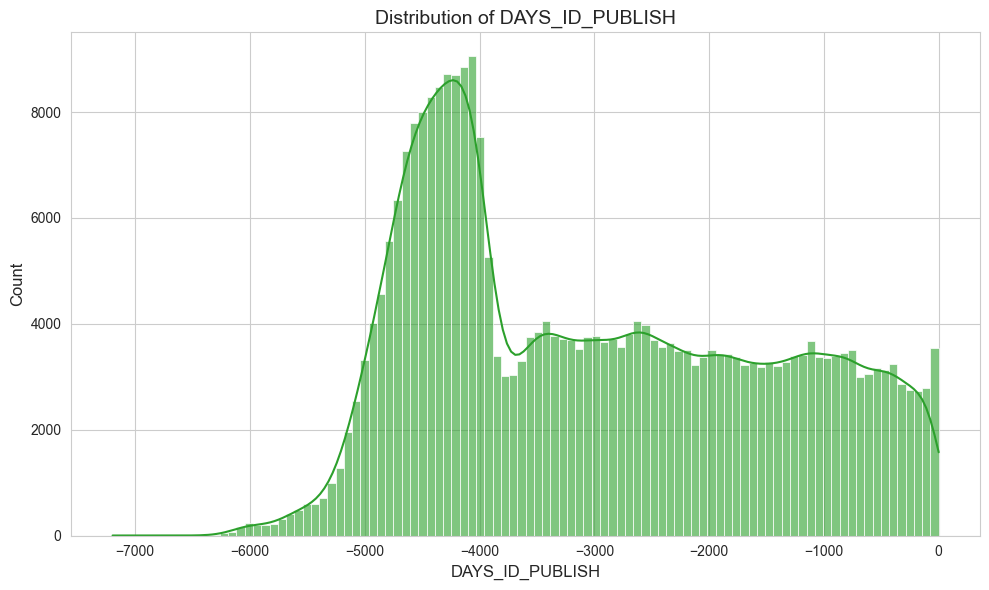

In [ ]:
plot_single_dist(app_train, 'DAYS_ID_PUBLISH', color="tab:green")

## 11. Compare Distributions by Target

Compare the distributions of key features between defaulted and non-defaulted loans to identify discriminative variables.

Analysis Components:
1. Financial Variable Comparison:
   - Income distribution differences
   - Credit amount patterns
   - Goods price variations
   - Annuity amount disparities

2. Temporal Variable Analysis:
   - Age distribution differences
   - Employment duration patterns
   - Registration timing variations
   - Document timing patterns

Key Insights Sought:
- Discriminative power of features
- Risk segment identification
- Feature importance indicators
- Potential cutoff points

Visualization Approach:
- Kernel density estimation (KDE)
- Overlaid distributions
- Clear color coding (TARGET=1 vs TARGET=0)
- Multi-panel comparison

This analysis helps in:
- Feature selection
- Risk factor identification
- Threshold setting
- Model development strategy

(<Figure size 1200x1000 with 4 Axes>,
 array([<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>,
        <Axes: xlabel='AMT_CREDIT', ylabel='Density'>,
        <Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>,
        <Axes: xlabel='AMT_ANNUITY', ylabel='Density'>], dtype=object))

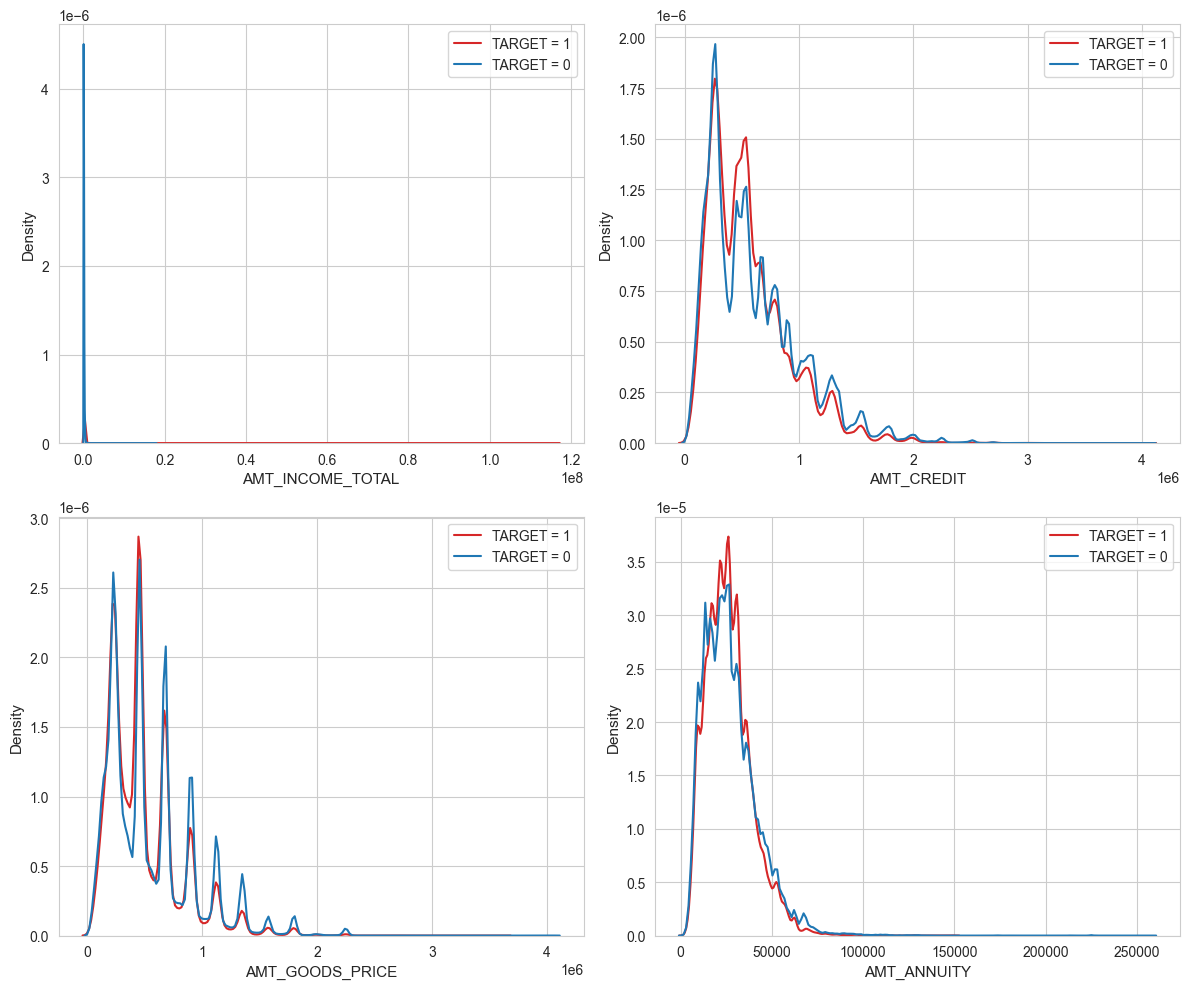

In [ ]:
plot_compare_dist(app_train, 
                  var_list=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY'],
                  target_col='TARGET')

(<Figure size 1200x1000 with 4 Axes>,
 array([<Axes: xlabel='DAYS_BIRTH', ylabel='Density'>,
        <Axes: xlabel='DAYS_EMPLOYED', ylabel='Density'>,
        <Axes: xlabel='DAYS_REGISTRATION', ylabel='Density'>,
        <Axes: xlabel='DAYS_ID_PUBLISH', ylabel='Density'>], dtype=object))

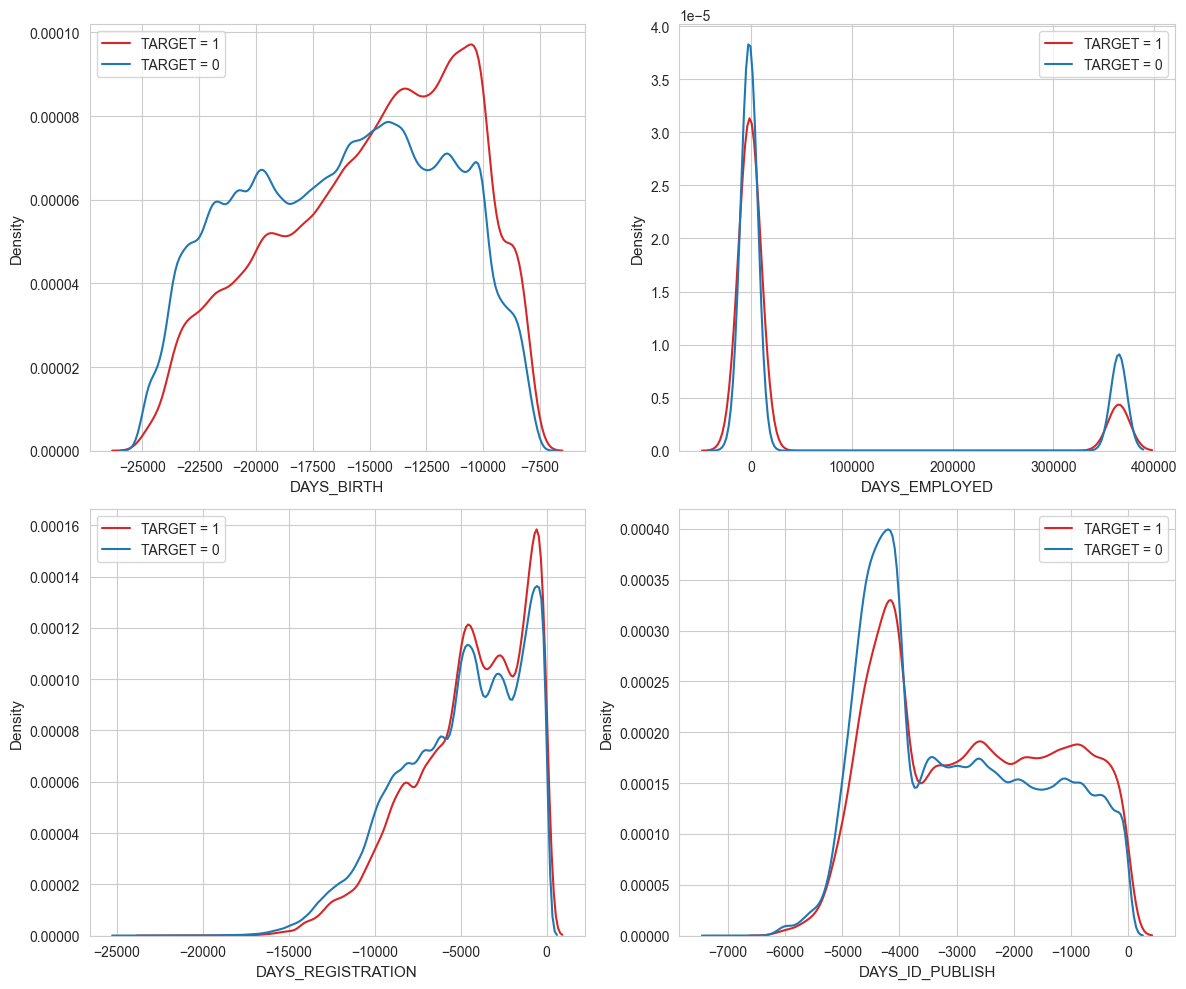

In [ ]:
plot_compare_dist(app_train, 
                  var_list=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'],
                  target_col='TARGET')

## 12. Correlation Heatmap

Plot a correlation heatmap to visualize relationships between numerical features and detect multicollinearity.

Analysis Objectives:
1. Feature Relationships:
   - Strong positive correlations
   - Strong negative correlations
   - Independent features
   - Redundant information

2. Multicollinearity Detection:
   - Highly correlated feature groups
   - Potential feature reduction needs
   - Information redundancy
   - Feature selection guidance

3. Model Implications:
   - Feature selection strategy
   - Dimension reduction needs
   - Model stability considerations
   - Feature engineering opportunities

Visualization Features:
- Intuitive color mapping
- Clear correlation strength indication
- Hierarchical clustering (optional)
- Masked redundant information

This analysis guides:
- Feature selection decisions
- Dimension reduction strategies
- Feature engineering approaches
- Model stability improvements

In [ ]:
def corr_heatmap(
    df,
    title: str = 'Correlation Heatmap',
    figsize: tuple = (16, 12),
    cmap: str = 'coolwarm',
    annotate: bool = False, # Set to True to show correlation values
    mask_upper: bool = True # Mask the upper triangle for cleaner look
):
    """
    Draw a simple correlation heatmap for the DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame.
        title (str, optional): Title of the plot. Default is 'Correlation Heatmap'.
        figsize (tuple, optional): Size of the figure. Default is (16, 12).
        cmap (str, optional): Color map. Default is 'coolwarm'.
        annotate (bool, optional): Display correlation values on the plot. Default is False.
        mask_upper (bool, optional): Hide the upper triangle of the matrix. Default is True.
    """

    # Select only numeric columns
    df_numeric = df.select_dtypes(include=np.number)
    if df_numeric.empty:
        print("Warning: DataFrame contains no numeric columns for correlation calculation.")
        return

    corr_matrix = df_numeric.corr()

    # Create mask if upper triangle should be hidden
    mask = None
    if mask_upper:
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up figure and axes
    fig, ax = plt.subplots(figsize=figsize)

    # Draw heatmap
    sns.heatmap(
        corr_matrix,
        cmap=cmap,
        square=True,
        annot=annotate,
        fmt=".2f" if annotate else "", # Format numbers if displayed
        linewidths=0.5, # Lines between cells
        linecolor='white',
        mask=mask,
        ax=ax,
        cbar_kws={'shrink': 0.8} # Shrink color bar
    )

    ax.set_title(title, fontsize=16)
    plt.show()

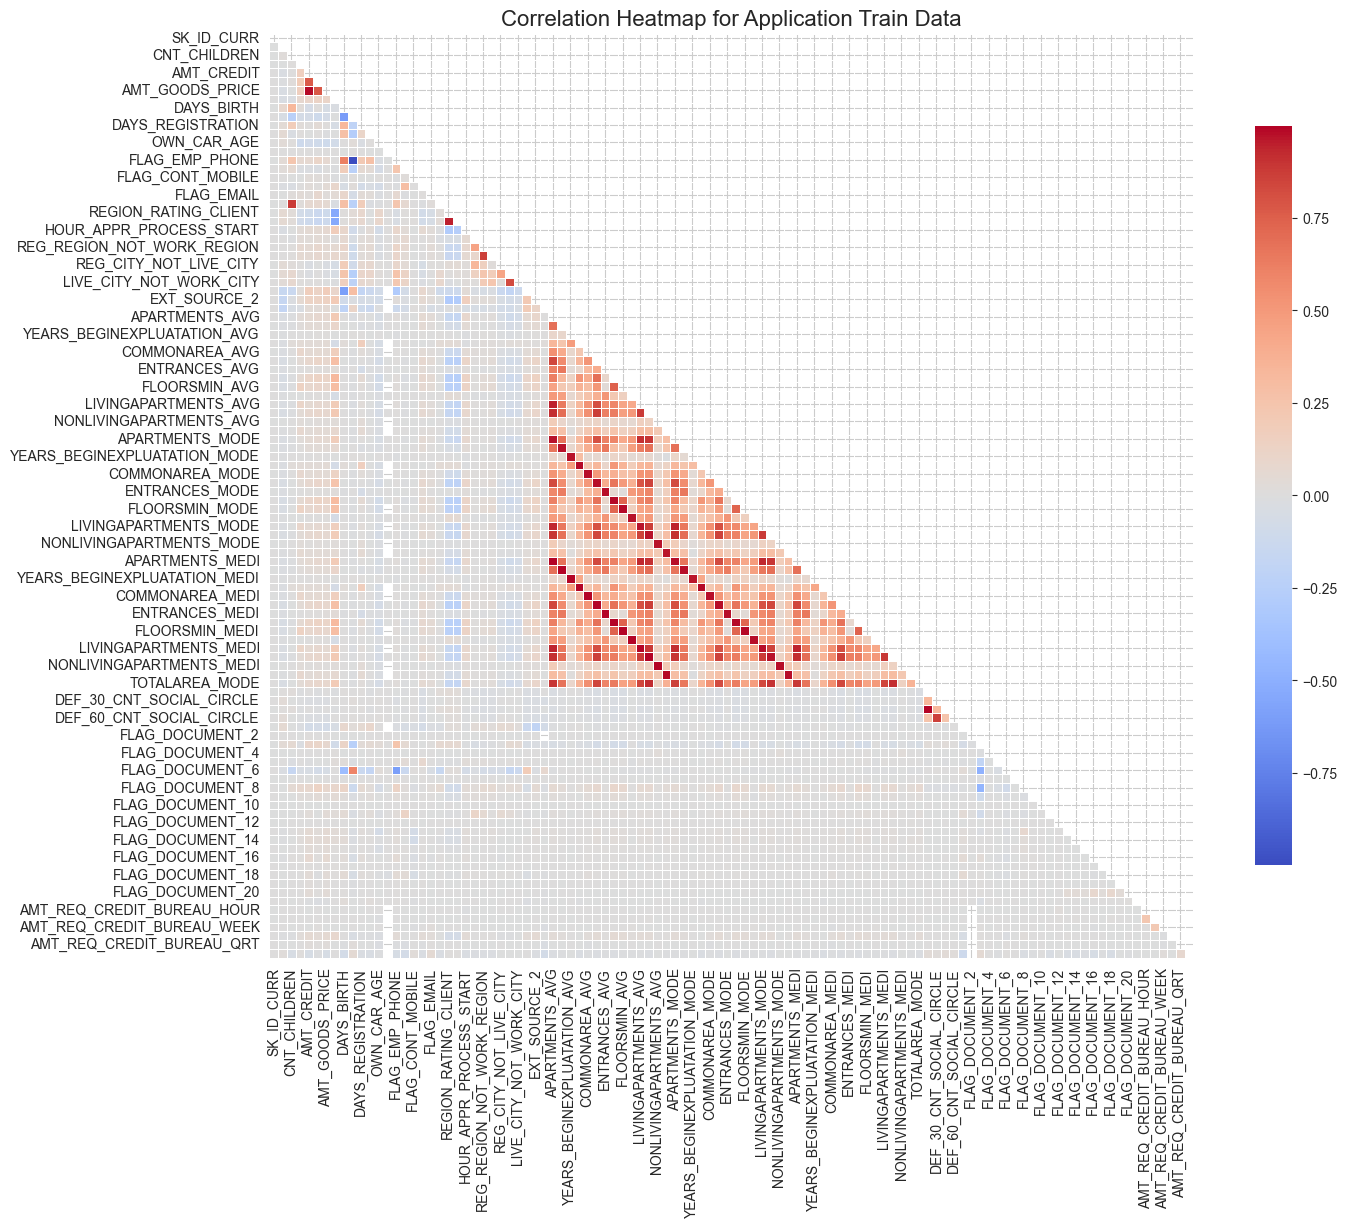

In [ ]:
corr_heatmap(app_train, title='Correlation Heatmap for Application Train Data')

## 13. Top Correlated Features with Target

Highlight features that have the strongest correlation with the target variable to guide feature selection. This analysis helps identify:
- Features with strong positive or negative correlations with default risk
- Potential predictive variables for the model
- Groups of correlated features that might need feature selection or dimensionality reduction

The threshold of 0.03 is used to focus on moderately to strongly correlated features.

In [ ]:
def plot_corr_heatmap(
    df,
    target: str = 'TARGET',
    thresh: float = 0.03,
    size: tuple = (16, 12),
    cmap: str = 'coolwarm',
    ann: bool = True,
    mask: bool = True
):
    """
    Plot a heatmap of features strongly correlated with the target variable.
    """
    df_num = df.select_dtypes(include=np.number)
    if df_num.empty or target not in df_num.columns:
        print(f"Error: Missing numeric columns or '{target}' column.")
        return

    corr_mat = df_num.corr()
    
    # Get columns related to target
    cols = corr_mat[target].abs()
    top_cols = cols[cols >= thresh].index.tolist()
    if target not in top_cols: top_cols.append(target) # Ensure target is included

    final_corr = df_num[top_cols].corr()

    # Apply mask if needed
    mask_arr = np.triu(np.ones_like(final_corr, dtype=bool)) if mask else None

    # Plot
    fig, ax = plt.subplots(figsize=size)
    sns.heatmap(final_corr, cmap=cmap, annot=ann, fmt=".2f",
                linewidths=0.5, linecolor='white', mask=mask_arr, ax=ax,
                cbar_kws={'shrink': 0.8})

    ax.set_title(f'Top Features Correlated with {target} (Abs Corr >= {thresh})', fontsize=16)
    plt.tight_layout()
    plt.show()

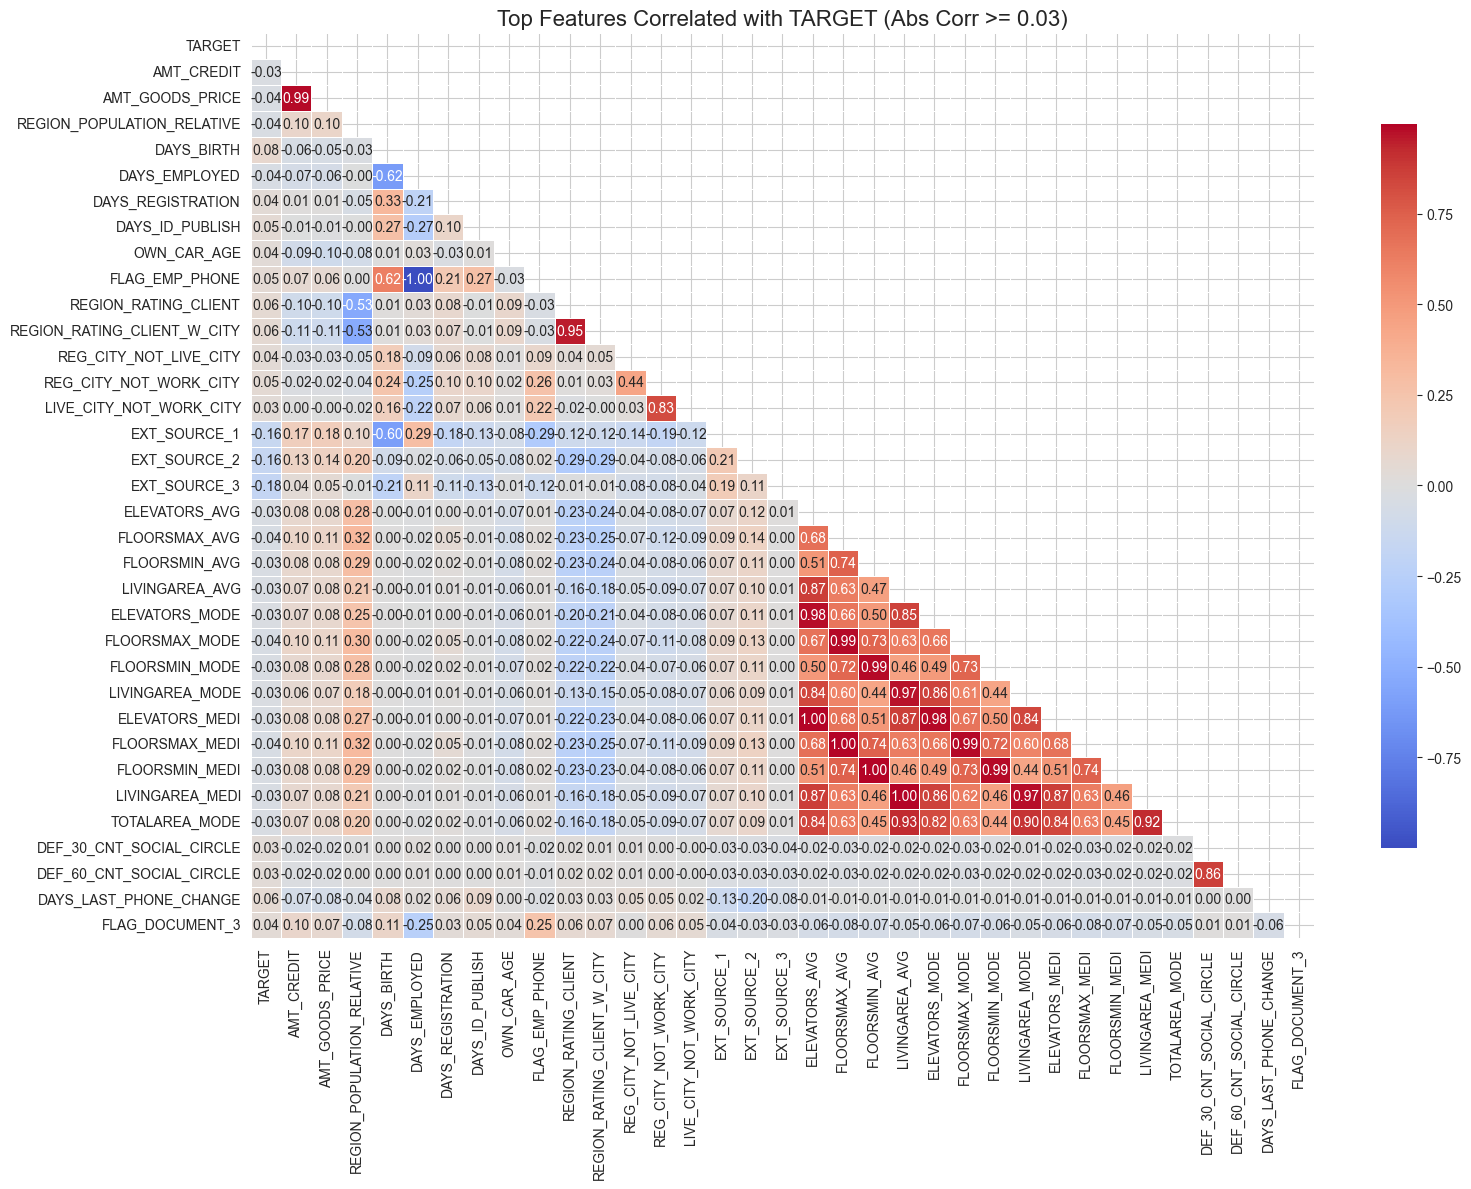

In [ ]:
plot_corr_heatmap(app_train, target='TARGET', thresh=0.03, size=(16, 12), cmap='coolwarm', ann=True, mask=True)

## 14. Bureau Credit Analysis

The bureau credit data provides historical credit information for each loan application. This section analyzes:

### 14.1 Credit Status Analysis
First, we'll look at the credit activity status (CREDIT_ACTIVE) distribution and its relationship with default risk:
- Distribution of active vs closed credits
- Default rates for different credit statuses
- Patterns in credit activity that might indicate risk

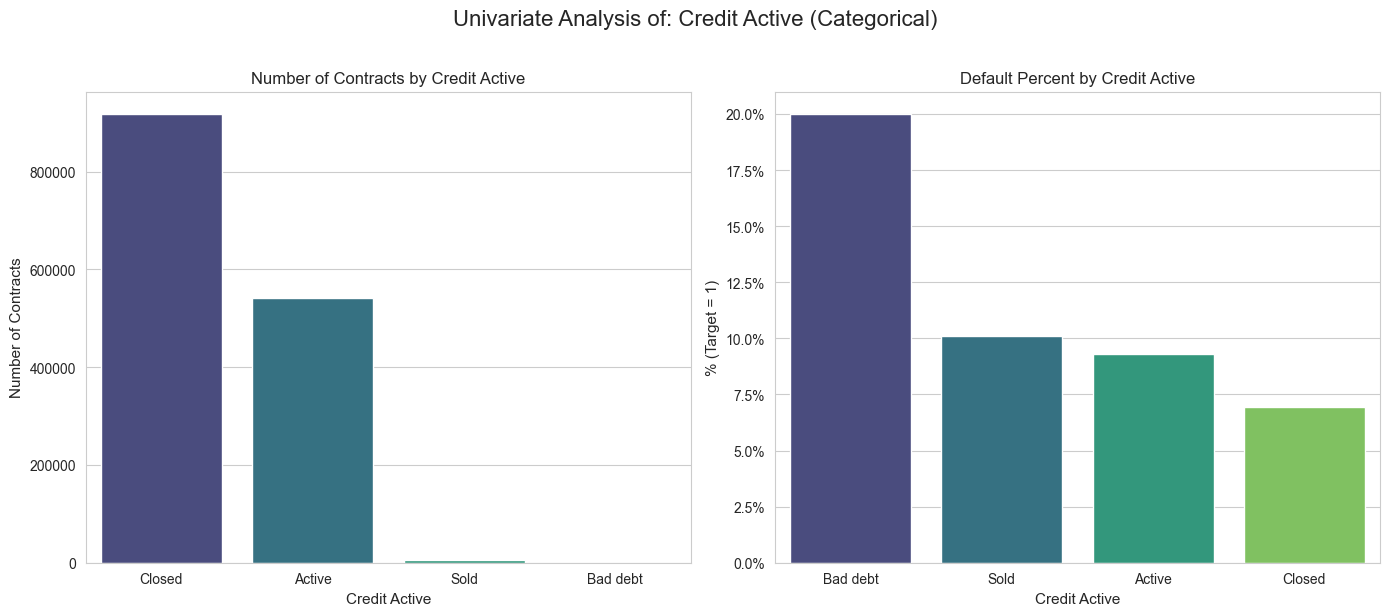

In [ ]:
plot_categorical(data=bur, feature='CREDIT_ACTIVE', target='TARGET')

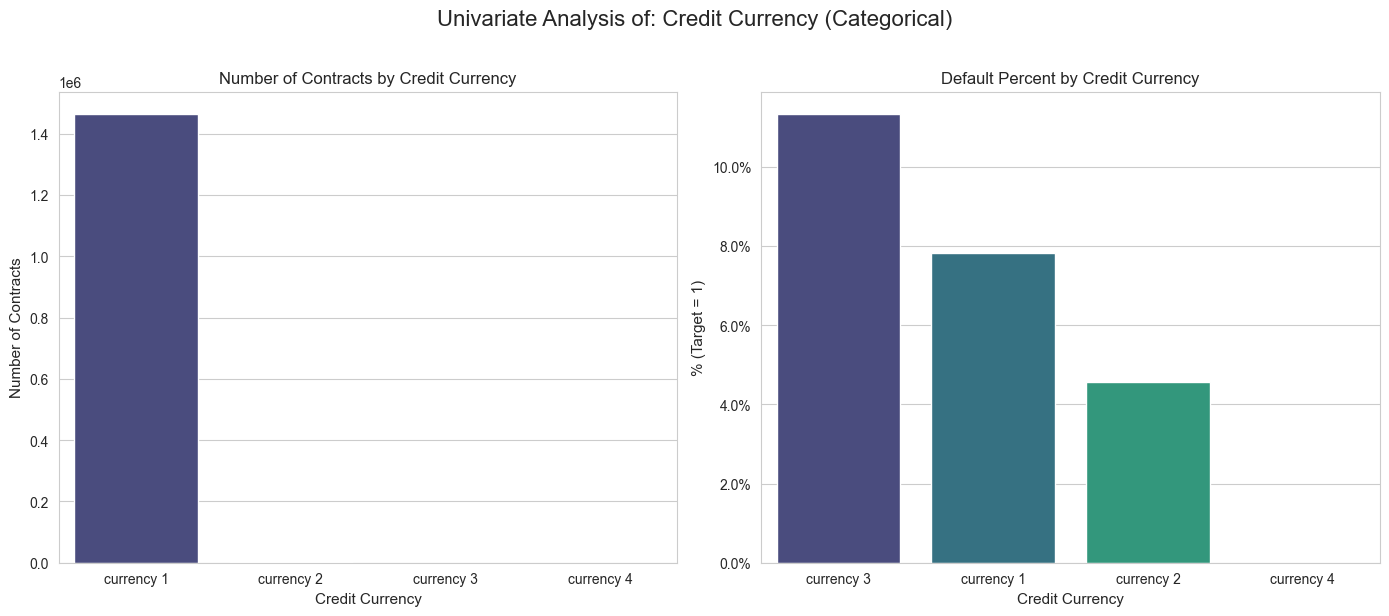

In [ ]:
plot_categorical(data=bur, feature='CREDIT_ACTIVE', target='TARGET')

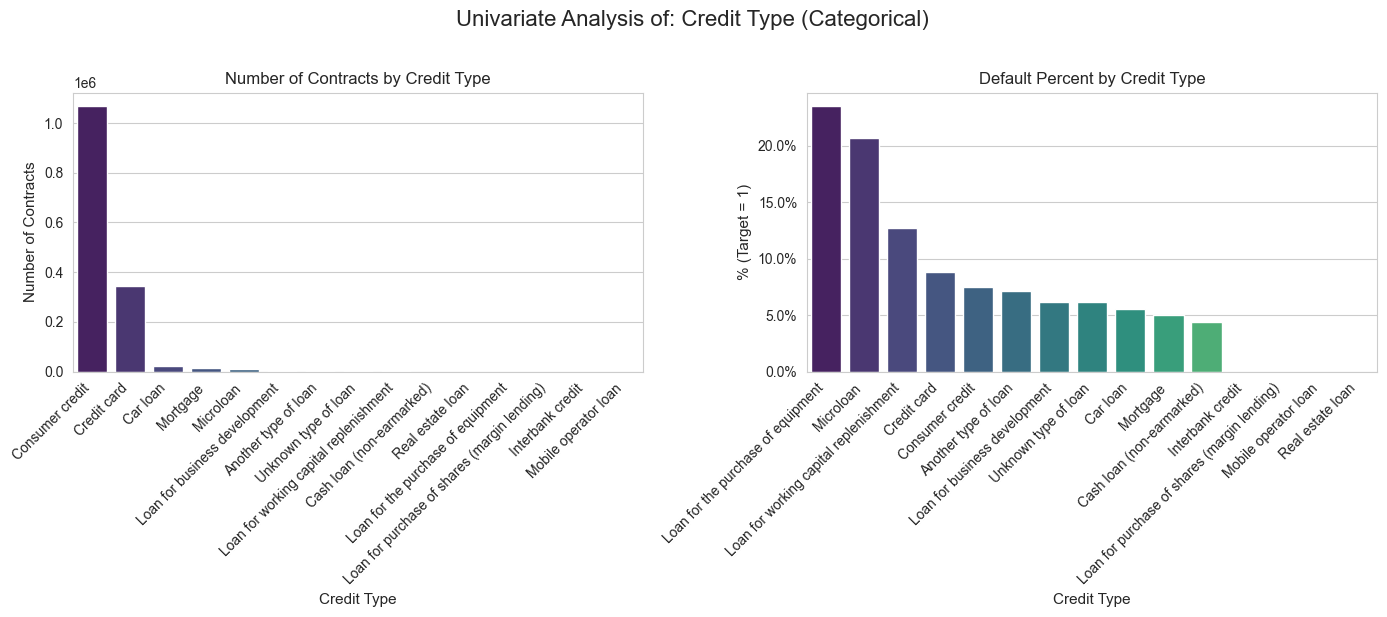

In [ ]:
plot_categorical(data=bur, feature='CREDIT_TYPE', target='TARGET', rotate_labels=True)

### 14.2 Credit Type Analysis

Analyzing different types of credit (CREDIT_TYPE) provides insights into:
- The variety of credit products in customers' history
- Which credit types are associated with higher default rates
- Potential risk patterns in different credit product categories

Understanding these patterns helps in:
- Risk assessment for different credit products
- Identifying high-risk credit type combinations
- Developing targeted credit policies for different product types

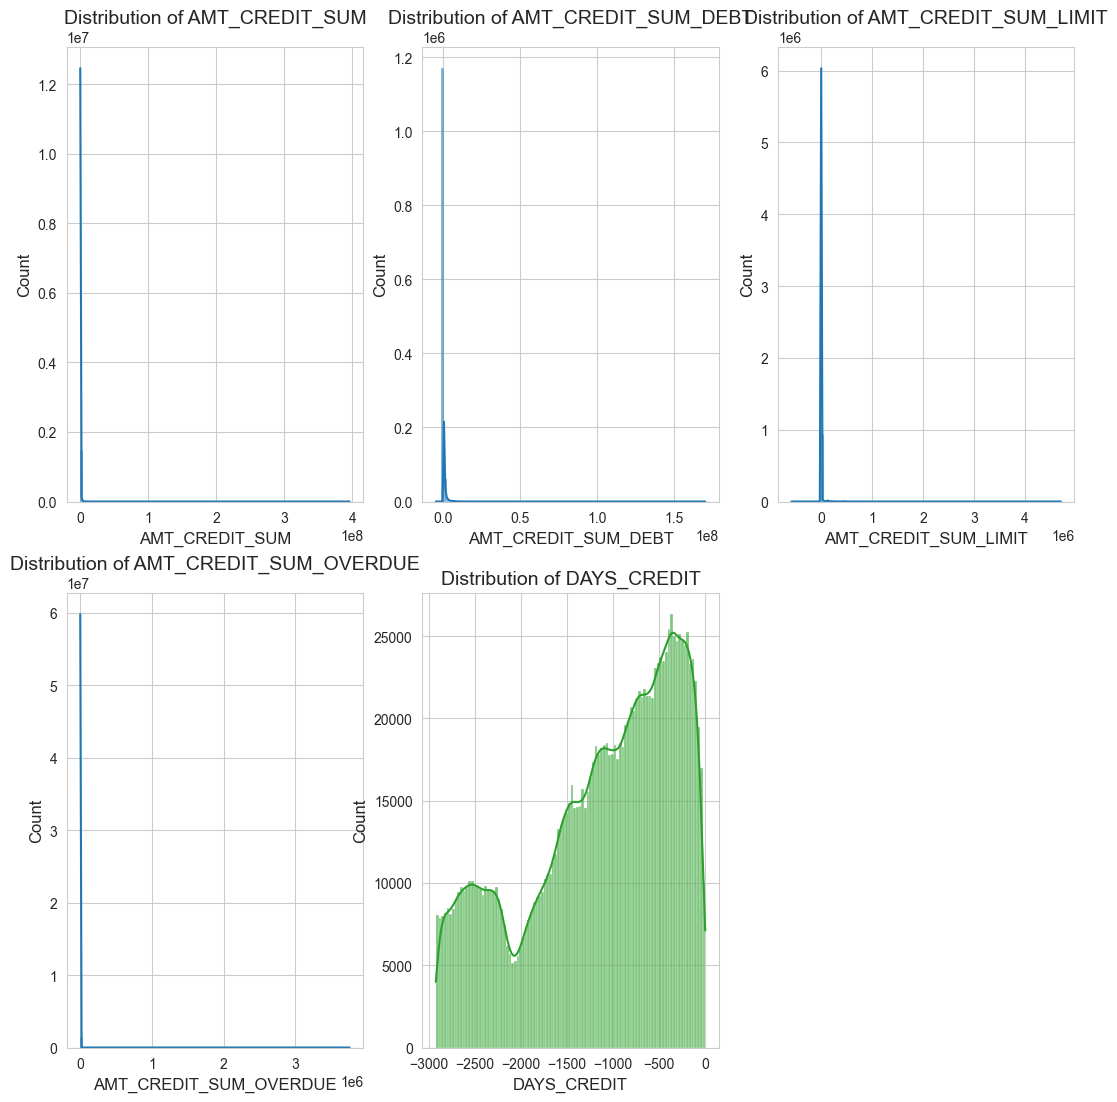

In [ ]:
f, ax = plt.subplots(2,3,figsize=(13, 13))
plot_single_dist(bur, 'AMT_CREDIT_SUM', ax=ax[0, 0], color='tab:blue')
plot_single_dist(bur, 'AMT_CREDIT_SUM_DEBT', ax=ax[0, 1], color='tab:blue')
plot_single_dist(bur, 'AMT_CREDIT_SUM_LIMIT', ax=ax[0, 2], color='tab:blue')
plot_single_dist(bur, 'AMT_CREDIT_SUM_OVERDUE', ax=ax[1, 0], color='tab:blue')
plot_single_dist(bur, 'DAYS_CREDIT', ax=ax[1, 1], color='tab:green')    
ax[1, 2].set_visible(False)


### 14.3 Credit Amounts and Timing Analysis

This section examines key numerical features from the bureau data:

1. Credit Amount Features:
   - AMT_CREDIT_SUM: Total credit amount
   - AMT_CREDIT_SUM_DEBT: Current debt amount
   - AMT_CREDIT_SUM_LIMIT: Credit limit
   - AMT_CREDIT_SUM_OVERDUE: Overdue amount

2. Timing Information:
   - DAYS_CREDIT: When the credit was taken

These distributions help understand:
- Typical credit amounts and their ranges
- Debt utilization patterns
- Prevalence of overdue amounts
- Temporal patterns in credit history

The analysis uses different colors to distinguish between:
- Financial metrics (blue)
- Time-based features (green)